<a href="https://colab.research.google.com/github/jaouni24/Car-Price-Predication/blob/main/CarPricePredication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cars.csv to cars (5).csv


In [ ]:
import pandas as pd
df = pd.read_csv('cars.csv')
print(df.head())

                           car name                 price engine_capacity  \
0           Fiat 500e 2021 La Prima                   TBD             0.0   
1     Peugeot Traveller 2021 L3 VIP           SAR 140,575             2.0   
2  Suzuki Jimny 2021 1.5L Automatic            SAR 98,785             1.5   
3    Ford Bronco 2021 2.3T Big Bend           SAR 198,000             2.3   
4     Honda HR-V 2021 1.8 i-VTEC LX  Orangeburst Metallic             1.8   

        cylinder horse_power  top_speed     seats    brand country  
0  N/A, Electric      Single  Automatic       150     fiat     ksa  
1              4         180   8 Seater       8.8  peugeot     ksa  
2              4         102        145  4 Seater   suzuki     ksa  
3              4         420   4 Seater       7.5     ford     ksa  
4              4         140        190  5 Seater    honda     ksa  


# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6308 entries, 0 to 6307
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   car name         6308 non-null   object
 1   price            6308 non-null   object
 2   engine_capacity  6308 non-null   object
 3   cylinder         5684 non-null   object
 4   horse_power      6308 non-null   object
 5   top_speed        6308 non-null   object
 6   seats            6308 non-null   object
 7   brand            6308 non-null   object
 8   country          6308 non-null   object
dtypes: object(9)
memory usage: 443.7+ KB


In [ ]:
df.isnull().sum()

,0
car name,0
price,0
engine_capacity,0
cylinder,624
horse_power,0
top_speed,0
seats,0
brand,0
country,0


In [ ]:
features_objects = [
    'car name', 'price', 'engine_capacity', 'cylinder', 'horse_power', 'top_speed', 'seats', 'brand', 'country'
]
for feature in features_objects:
    num_unique_makes = df[feature].nunique()
    print(f"Number of distinct values in '{feature}' column: {num_unique_makes}")

Number of distinct values in 'car name' column: 2546
Number of distinct values in 'price' column: 3395
Number of distinct values in 'engine_capacity' column: 129
Number of distinct values in 'cylinder' column: 10
Number of distinct values in 'horse_power' column: 330
Number of distinct values in 'top_speed' column: 169
Number of distinct values in 'seats' column: 82
Number of distinct values in 'brand' column: 82
Number of distinct values in 'country' column: 7


In [ ]:
# Get the distinct values in the 'engine_capacity' column
distinct_engine_capacity = df['engine_capacity'].unique()

# Print the distinct values
print("Distinct values in 'engine_capacity':")
print(distinct_engine_capacity)

Distinct values in 'engine_capacity':
['0.0' '2.0' '1.5' '2.3' '1.8' '2.5' '2.7' '5.2' '4.0' '3.5' '3.8' '1.6'
 '3.0' '6.2' '3.7' '6.5' '1.7' '1.4' '2.2' '2.4' '5.0' '6.7' '4.4' '5.7'
 '3.6' '1.2' '3.3' '2.9' '2.8' '6.0' '3.9' '1.3' '1.0' '3.2' '5.3' '4.5'
 '4.8' '6.4' '4.6' '5.6' '4.7' '5.5' '8.0' '6.3' '6.6' '5.9' '6.8' '2359'
 '1600' '1498' '5200' '3982' '1991' '1598' 'Cylinders' '1500' '1800'
 '1497' '2500' '1969' '2000' '1400' '4395' '1984' '1591' '2998' '2995'
 '1988' '2497' '1300' '1499' '3995' '1489' '1998' '1490' '2891' '1995'
 '4400' '1197' '1200' '1199' '1561' '1332' '3000' '1798' '1997' '1000'
 '1590' '1396' '1248' '1485' '999' '1395' '1587' '1368' '1586' '1299'
 '1597' '5300' '1496' '140' '2693' '3342' '2476' '1595' '3498' '3470'
 '3828' '2987' '4000' '2979' '4999' '5700' '5935' '4691' '3600' '3993'
 '5950' '6000' '2894' '2981' '6752' '3400' '3996' '1.9' '4.2' '3.4' '2.1'
 '4.1']


The output indicates that the engine_capacity feature contains inconsistent and potentially incorrect data. For instance, values like 'Cylinders', '140', or '5200' are unusual or invalid when referring to car engine capacities.

Filter Out Non-Numeric Values: Remove invalid entries like 'Cylinders'.

Normalize Units: Convert all values to a single unit, e.g., liters. Assume values > 10 are in cubic centimeters (cc), and divide by 1000 to convert to liters.

Handle Edge Cases: Decide how to deal with extreme or invalid values (e.g., '140').

3
Cleaned distinct engine capacities (in liters):
[0.    0.14  0.999 1.    1.197 1.199 1.2   1.248 1.299 1.3   1.332 1.368
 1.395 1.396 1.4   1.485 1.489 1.49  1.496 1.497 1.498 1.499 1.5   1.561
 1.586 1.587 1.59  1.591 1.595 1.597 1.598 1.6   1.7   1.798 1.8   1.9
 1.969 1.984 1.988 1.991 1.995 1.997 1.998 2.    2.1   2.2   2.3   2.359
 2.4   2.476 2.497 2.5   2.693 2.7   2.8   2.891 2.894 2.9   2.979 2.981
 2.987 2.995 2.998 3.    3.2   3.3   3.342 3.4   3.47  3.498 3.5   3.6
 3.7   3.8   3.828 3.9   3.982 3.993 3.995 3.996 4.    4.1   4.2   4.395
 4.4   4.5   4.6   4.691 4.7   4.8   4.999 5.    5.2   5.3   5.5   5.6
 5.7   5.9   5.935 5.95  6.    6.2   6.3   6.4   6.5   6.6   6.7   6.752
 6.8   8.   ]


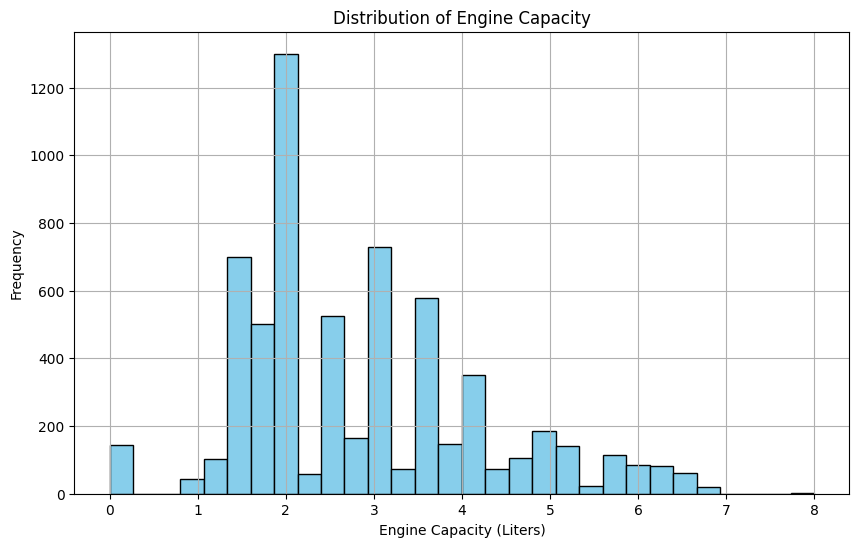

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def clean_engine_capacity(value):
    try:
        # Convert to float
        num_value = float(value)

        # If value > 10, assume it's in cc and convert to liters
        if num_value > 10:
            return num_value / 1000  # Convert cc to liters
        return num_value  # Already in liters
    except ValueError:
        # Return NaN for non-numeric values
        return np.nan

# Apply cleaning function directly to the original df
df['engine_capacity_cleaned'] = df['engine_capacity'].apply(clean_engine_capacity)

# Drop rows with NaN values in the cleaned column (not the original one)
print(df['engine_capacity_cleaned'].isna().sum()) #engine capacity equal 'Cylineders'
df.dropna(subset=['engine_capacity_cleaned'], inplace=True)

# Drop the original 'engine_capacity' column since it's no longer needed
df.drop(columns=['engine_capacity'], inplace=True)

# View distinct cleaned values
distinct_cleaned_values = df['engine_capacity_cleaned'].unique()
print("Cleaned distinct engine capacities (in liters):")
print(np.sort(distinct_cleaned_values))

# Plot the distribution of the engine capacity feature
plt.figure(figsize=(10, 6))
plt.hist(df['engine_capacity_cleaned'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Engine Capacity')
plt.xlabel('Engine Capacity (Liters)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


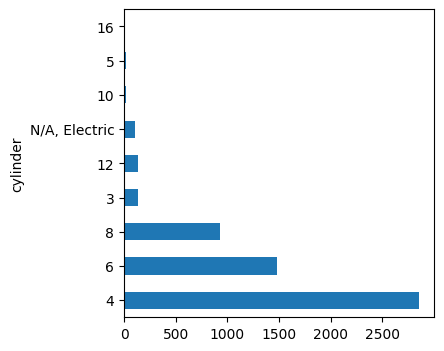

In [ ]:
df['cylinder'].value_counts().plot.barh(figsize=(4, 4));

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6305 entries, 0 to 6307
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   car name                 6305 non-null   object 
 1   price                    6305 non-null   object 
 2   cylinder                 5681 non-null   object 
 3   horse_power              6305 non-null   object 
 4   top_speed                6305 non-null   object 
 5   seats                    6305 non-null   object 
 6   brand                    6305 non-null   object 
 7   country                  6305 non-null   object 
 8   engine_capacity_cleaned  6305 non-null   float64
dtypes: float64(1), object(8)
memory usage: 492.6+ KB


In [ ]:
# Count the number of rows where engine_capacity_cleaned is 0.0
zero_capacity_count = df[df['engine_capacity_cleaned'] == 0.0].shape[0]

print(f"Number of cars with engine capacity equal to 0: {zero_capacity_count}")

Number of cars with engine capacity equal to 0: 143


<ipython-input-386-14ea39393a02>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cylinder_counts.index, y=cylinder_counts.values, palette='viridis')


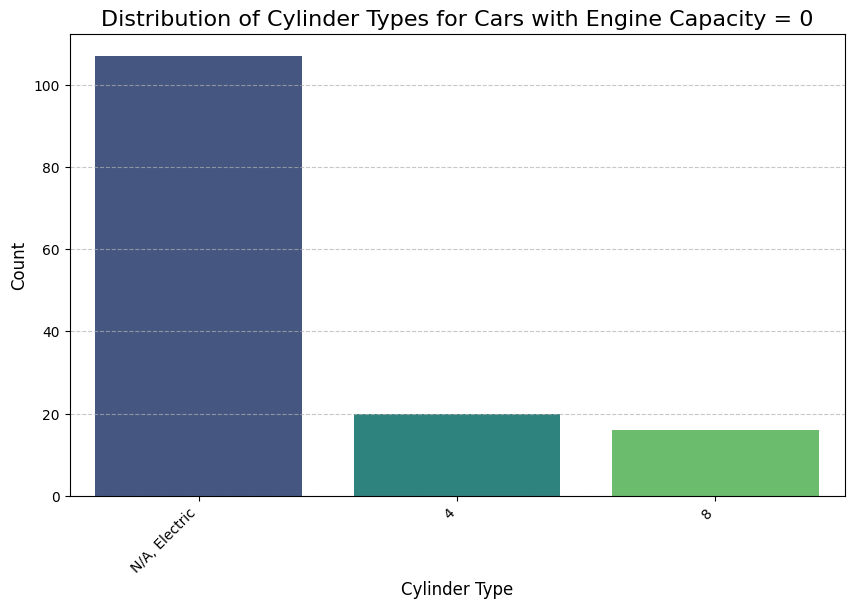

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter cars with engine_capacity == 0
capacity_zero = df[df['engine_capacity_cleaned'] == 0.0]

# Count occurrences of each unique cylinder value
cylinder_counts = capacity_zero['cylinder'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=cylinder_counts.index, y=cylinder_counts.values, palette='viridis')

# Add labels and title
plt.title('Distribution of Cylinder Types for Cars with Engine Capacity = 0', fontsize=16)
plt.xlabel('Cylinder Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

For cars with engine_capacity == 0, "N/A, Electric" is a reliable indicator that the vehicle is an electric car.

The presence of cylinder counts for some entries might require further investigation into how the data was recorded.

In [ ]:
# Assuming 'cylinder_type' contains the values 4 or 8, and 'engine_capacity_cleaned' contains engine capacities

# Filter the dataframe for engine capacity equal to 0.0 and cylinder type being 4 or 8
zero_capacity_4_and_8 = df[(df['engine_capacity_cleaned'] == 0.0) & ((df['cylinder']=='4') | (df['cylinder']=='8'))]

# Get the number of rows
zero_capacity_count = zero_capacity_4_and_8.shape[0]

print(f"Number of rows with engine capacity 0.0 and cylinder type 4 or 8: {zero_capacity_count}")

# Drop the filtered rows from the original dataframe
df.drop(zero_capacity_4_and_8.index, inplace=True)

# Verify that the rows are dropped by checking the shape
print(f"Number of rows after dropping: {df.shape[0]}")

Number of rows with engine capacity 0.0 and cylinder type 4 or 8: 36
Number of rows after dropping: 6269


In [ ]:
# Get the distinct values in the 'engine_capacity' column
distinct_engine_capacity = df['cylinder'].unique()

# Print the distinct values
print("Distinct values in 'cylinder':")
print(distinct_engine_capacity)

Distinct values in 'cylinder':
['N/A, Electric' '4' '6' '12' '8' nan '3' '5' '10' '16']


N/A Electric is electrice veichels where the engine capacity is equal to zero. it's not an outlaier and it will be handeled later.

In [ ]:
import pandas as pd

# Get the number of missing values in the 'cylinder' feature
missing_cylinder = df['cylinder'].isnull().sum()
print(f"Number of missing values in 'cylinder': {missing_cylinder}")

# Calculate the percentage of missing values across all features
total_cells = df.size
total_missing = df.isnull().sum().sum()
missing_percentage = (total_missing / total_cells) * 100

print(f"Percentage of missing values across all features: {missing_percentage:.2f}%")

Number of missing values in 'cylinder': 624
Percentage of missing values across all features: 1.11%


In [ ]:
import pandas as pd
import numpy as np

# Define ordinal encoding
cylinder_encoding = {
    'N/A, Electric': 0,  # Electric vehicles
    '3': 3,   # Smallest cylinder engines
    '4': 4,
    '5': 5,
    '6': 6,
    '8': 8,
    '10': 10,
    '12': 12,
    '16': 16,
    np.nan: np.nan  # Preserve missing values for imputation later
}

# Apply encoding
df['cylinder_encoded'] = df['cylinder'].map(cylinder_encoding)
df.drop(columns=['cylinder'], inplace=True)

In [ ]:
# Calculate the correlation between the 'cylinder_encoded' and 'engine_capacity_cleaned'
correlation = df[['cylinder_encoded', 'engine_capacity_cleaned']].corr()

# Print the correlation matrix
print(correlation)

                         cylinder_encoded  engine_capacity_cleaned
cylinder_encoded                 1.000000                 0.919791
engine_capacity_cleaned          0.919791                 1.000000


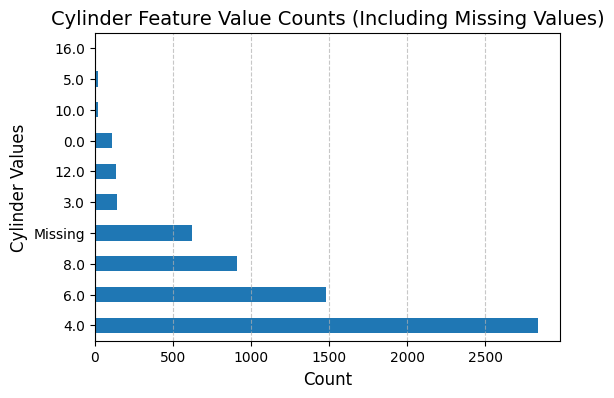

In [ ]:
# Count values, including missing values
cylinder_counts = df['cylinder_encoded'].value_counts(dropna=False)

# Replace NaN with 'Missing' for better labeling
cylinder_counts.index = cylinder_counts.index.fillna('Missing')

# Plot horizontal bar chart
plt.figure(figsize=(6, 4))
cylinder_counts.plot.barh()
plt.title("Cylinder Feature Value Counts (Including Missing Values)", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Cylinder Values", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

the results show high correlation between engine capacity and cylinder, we will depnd on when filling missing values.

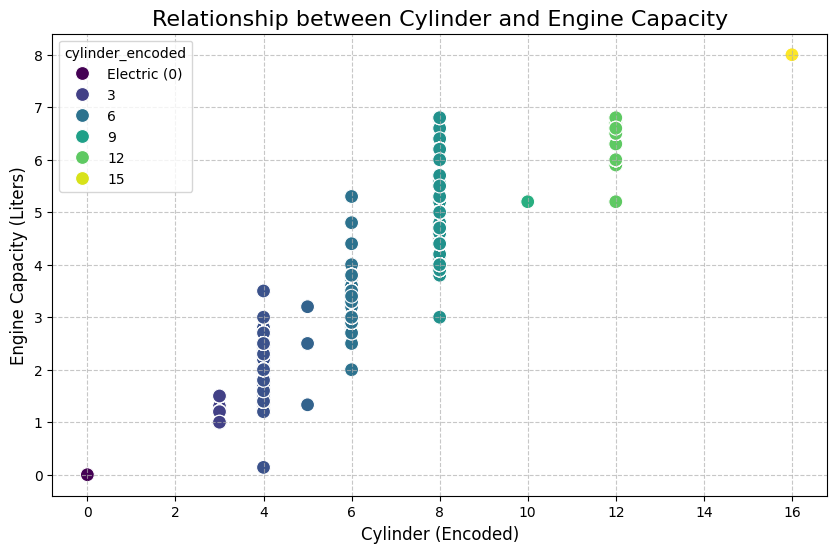

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for the relationship between cylinder_encoded and engine_capacity_cleaned
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    x='cylinder_encoded',
    y='engine_capacity_cleaned',
    data=df,
    hue='cylinder_encoded',
    palette='viridis',
    s=100
)

# Update the legend to include "Electric" for value 0
legend_labels = scatter.legend_.texts
legend_labels[0].set_text('Electric (0)')
# Optionally, update additional labels if necessary
# legend_labels[2].set_text('Other (value)')

# Adding labels and title
plt.title('Relationship between Cylinder and Engine Capacity', fontsize=16)
plt.xlabel('Cylinder (Encoded)', fontsize=12)
plt.ylabel('Engine Capacity (Liters)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.show()

In [ ]:
import numpy as np
import pandas as pd

# Define conditions and corresponding cylinder values
conditions = [
    (df['engine_capacity_cleaned'] == 0),                     # Engine capacity = 0
    (df['engine_capacity_cleaned'] > 0) & (df['engine_capacity_cleaned'] <= 1.5),  # 0 < Engine capacity <= 1.5
    (df['engine_capacity_cleaned'] > 1.5) & (df['engine_capacity_cleaned'] <= 3),  # 1.5 < Engine capacity <= 3
    (df['engine_capacity_cleaned'] > 3) & (df['engine_capacity_cleaned'] <= 4.5),  # 3 < Engine capacity <= 4.5
    (df['engine_capacity_cleaned'] > 4.5) & (df['engine_capacity_cleaned'] <= 6),  # 4.5 < Engine capacity <= 6
    (df['engine_capacity_cleaned'] > 6) & (df['engine_capacity_cleaned'] <= 7),    # 6 < Engine capacity <= 7
    (df['engine_capacity_cleaned'] > 7) & (df['engine_capacity_cleaned'] <= 8)     # 7 < Engine capacity <= 8
]

# Corresponding cylinder values
cylinder_values = [0, 3, 4, 6, 8, 12, 15]

# Create a new 'cylinder_encoded' column using np.select and the conditions
df['cylinder_encoded'] = np.select(conditions, cylinder_values, default=np.nan)

# Fill missing values based on the conditions
df['cylinder_encoded'] = df['cylinder_encoded'].fillna(df['cylinder_encoded'])

# Get the number of missing values in the 'cylinder' feature
missing_cylinder = df['cylinder_encoded'].isnull().sum()

print(f"Number of missing values in 'cylinder': {missing_cylinder}")


Number of missing values in 'cylinder': 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6269 entries, 0 to 6307
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   car name                 6269 non-null   object 
 1   price                    6269 non-null   object 
 2   horse_power              6269 non-null   object 
 3   top_speed                6269 non-null   object 
 4   seats                    6269 non-null   object 
 5   brand                    6269 non-null   object 
 6   country                  6269 non-null   object 
 7   engine_capacity_cleaned  6269 non-null   float64
 8   cylinder_encoded         6269 non-null   float64
dtypes: float64(2), object(7)
memory usage: 489.8+ KB


In [ ]:
# Get the distinct values in the 'engine_capacity' column
distinct_horse_power = df['horse_power'].unique()

# Print the distinct values
print("Distinct values in 'horse_power':")
print(distinct_horse_power)

Distinct values in 'horse_power':
['Single' '180' '102' '420' '140' '120' '170' '542' '900' '198' '700'
 '152' 'Double' '503' '530' '355' '121' '400' '335' '168' '231' '382'
 '495' '155' '200' '275' '250' '112' '124' '1973' '254' '770' '320' '118'
 '139' '95' '600' '103' '363' '233' '315' '105' '226' '505' '128' '585'
 '340' '422' '850' '523' '462' '268' '639' '395' '354' '82' '258' '440'
 '252' '224' '290' '100' '192' '500' '123' '365' '165' '136' '184' '292'
 '680' '550' '460' '367' '211' '330' '104' '245' '107' '277' '379' '465'
 '612' '510' '562' '435' '280' '476' '204' '740' '147' '251' '558' '650'
 '380' '169' '189' '702' '402' '350' '410' '225' '25' '78' '800' '718'
 '156' '194' '710' '255' '755' '220' '620' '115' '630' '283' '238' '185'
 '173' '98' '160' '135' '119' '84' '110' '138' '127' '150' '148' '91'
 '130' '132' '167' '175' '113' '153' '164' '205' '215' '174' '163' '188'
 '227' '221' '158' '212' '176' '172' '197' '240' '181' '298' '248' '241'
 '305' '228' '190' '257' '310

Horsepower should typically be a numeric value. However, the presence of values like 'Single', 'Double', and 'Triple' indicates that non-numeric categorical data has been included.

Values like '1973' or '1479' seem unusually high for horsepower, suggesting potential data entry errors or invalid records.

Use pandas.to_numeric() to convert the column to a numeric type. Non-convertible entries will raise errors or be converted to NaN.

In [ ]:
df['horse_power'] = pd.to_numeric(df['horse_power'], errors='coerce')

This will replace non-numeric values (e.g., 'Single', 'Double') with NaN.

Mean of 'horse_power': 290.09
Median of 'horse_power': 255.00
Mode of 'horse_power': 150.00


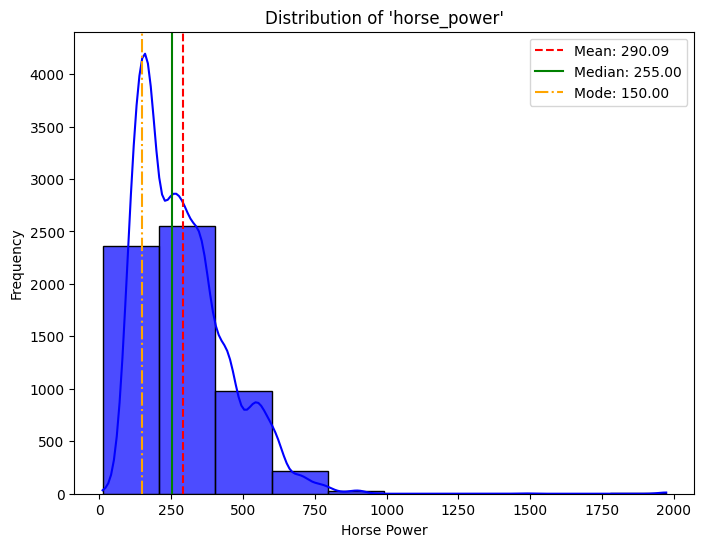

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop missing values for calculations and visualization
horse_power_clean = df['horse_power'].dropna()

# Calculate mean, median, and mode
mean_hp = horse_power_clean.mean()
median_hp = horse_power_clean.median()
mode_hp = horse_power_clean.mode().iloc[0]  # Extract the first mode value

# Print the results
print(f"Mean of 'horse_power': {mean_hp:.2f}")
print(f"Median of 'horse_power': {median_hp:.2f}")
print(f"Mode of 'horse_power': {mode_hp:.2f}")

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.histplot(horse_power_clean, kde=True, bins=10, color='blue', alpha=0.7)
plt.axvline(mean_hp, color='red', linestyle='--', label=f"Mean: {mean_hp:.2f}")
plt.axvline(median_hp, color='green', linestyle='-', label=f"Median: {median_hp:.2f}")
plt.axvline(mode_hp, color='orange', linestyle='-.', label=f"Mode: {mode_hp:.2f}")
plt.title("Distribution of 'horse_power'")
plt.xlabel("Horse Power")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [ ]:
# Drop missing values for calculations
horse_power_clean = df['horse_power'].dropna()

# Calculate Q1, Q3, and IQR
Q1 = horse_power_clean.quantile(0.25)
Q3 = horse_power_clean.quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = horse_power_clean[(horse_power_clean < lower_bound) | (horse_power_clean > upper_bound)]

# Count and percentage of outliers
num_outliers = len(outliers)
percentage_outliers = (num_outliers / len(horse_power_clean)) * 100

# Print results
print(f"Number of outliers: {num_outliers}")
print(f"Percentage of outliers: {percentage_outliers:.2f}%")

Number of outliers: 116
Percentage of outliers: 1.89%


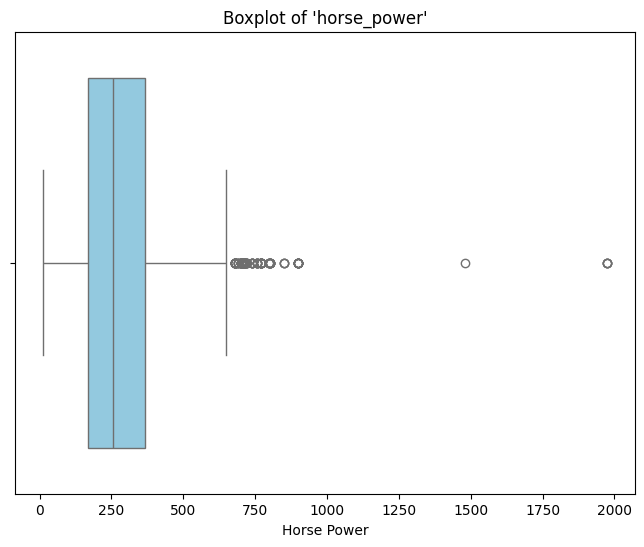

In [ ]:
# Drop missing values for the boxplot
horse_power_clean = df['horse_power'].dropna()

# Plot the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=horse_power_clean, color='skyblue')
plt.title("Boxplot of 'horse_power'")
plt.xlabel("Horse Power")
plt.show()

Outliers can significantly influence the mean, which in your case is 290.09 (much higher than the median of 255.00 and mode of 150.00). This suggests the presence of extreme values. Here’s how you can handle them:

a. Option 1: Remove Outliers (IQR method)
The Interquartile Range (IQR) method is a common approach to detect and remove outliers.

After dropping outliers, the updated statistics suggest a reduced skewness in the horse_power distribution.

In [ ]:
Q1 = df['horse_power'].quantile(0.25)
Q3 = df['horse_power'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['horse_power'] >= lower_bound) & (df['horse_power'] <= upper_bound)]

In [ ]:
# Drop missing values for calculations and visualization
horse_power_clean = df['horse_power'].dropna()

# Calculate mean, median, and mode
mean_hp = horse_power_clean.mean()
median_hp = horse_power_clean.median()
mode_hp = horse_power_clean.mode().iloc[0]  # Extract the first mode value

# Print the results
print(f"Mean of 'horse_power': {mean_hp:.2f}")
print(f"Median of 'horse_power': {median_hp:.2f}")
print(f"Mode of 'horse_power': {mode_hp:.2f}")

Mean of 'horse_power': 280.42
Median of 'horse_power': 252.00
Mode of 'horse_power': 150.00


In [ ]:
# Calculate the number of missing values
missing_values = df['horse_power'].isnull().sum()

# Calculate the percentage of missing values
total_values = len(df['horse_power'])
missing_percentage = (missing_values / total_values) * 100

# Print the results
print(f"Number of missing values in 'horse_power': {missing_values}")
print(f"Percentage of missing values: {missing_percentage:.2f}%")

Number of missing values in 'horse_power': 0
Percentage of missing values: 0.00%


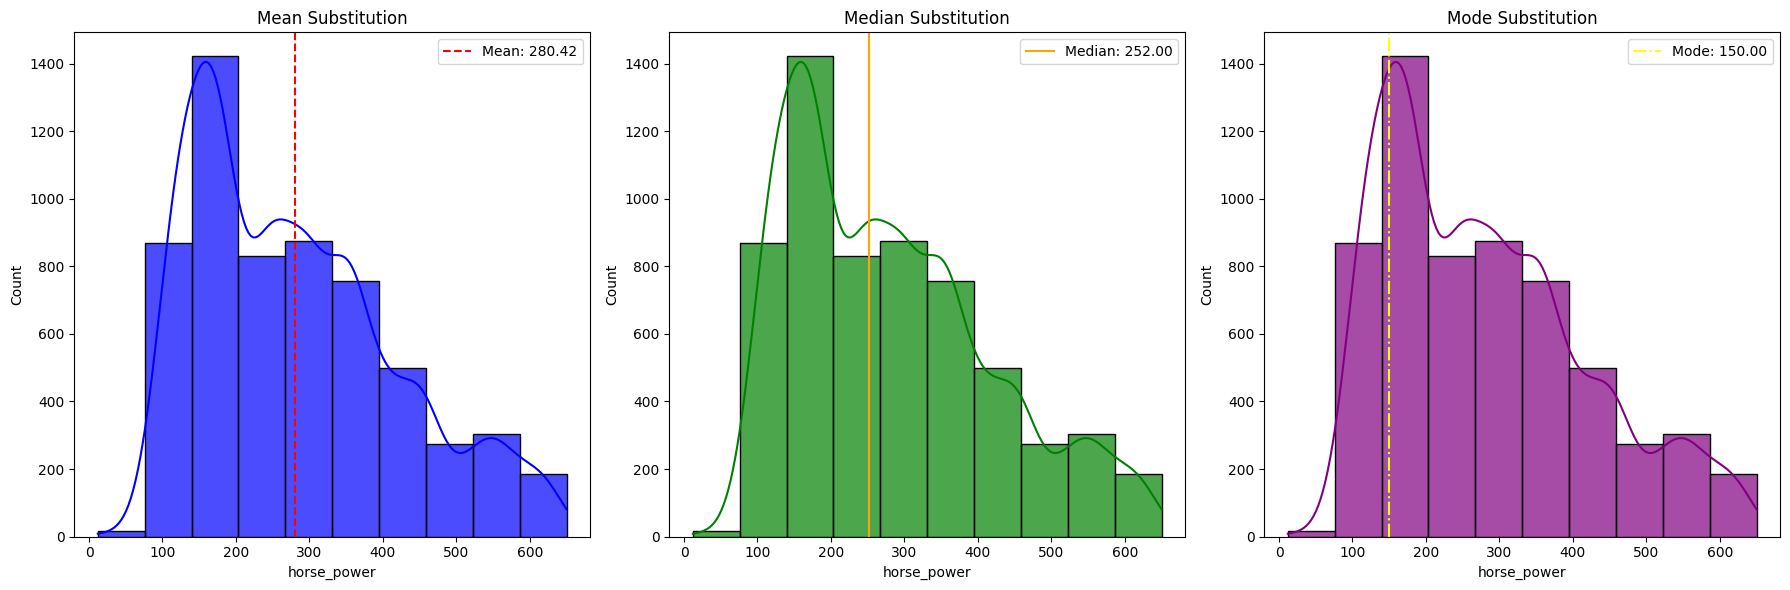

Statistics after Mean Substitution:
count    6034.000000
mean      280.421777
std       138.073877
min        12.000000
25%       165.000000
50%       252.000000
75%       362.000000
max       650.000000
Name: horse_power, dtype: float64

Statistics after Median Substitution:
count    6034.000000
mean      280.421777
std       138.073877
min        12.000000
25%       165.000000
50%       252.000000
75%       362.000000
max       650.000000
Name: horse_power, dtype: float64

Statistics after Mode Substitution:
count    6034.000000
mean      280.421777
std       138.073877
min        12.000000
25%       165.000000
50%       252.000000
75%       362.000000
max       650.000000
Name: horse_power, dtype: float64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create separate copies of the dataset for each imputation method
df_mean = df.copy()
df_median = df.copy()
df_mode = df.copy()

# Calculate mean, median, and mode
mean_hp = df['horse_power'].mean()
median_hp = df['horse_power'].median()
mode_hp = df['horse_power'].mode()[0]

# Impute missing values in each copy
df_mean['horse_power'] = df_mean['horse_power'].fillna(mean_hp)
df_median['horse_power'] = df_median['horse_power'].fillna(median_hp)
df_mode['horse_power'] = df_mode['horse_power'].fillna(mode_hp)

# Plot the distributions for each imputation method
plt.figure(figsize=(18, 6))

# Distribution after mean substitution
plt.subplot(1, 3, 1)
sns.histplot(df_mean['horse_power'], kde=True, bins=10, color='blue', alpha=0.7)
plt.title("Mean Substitution")
plt.axvline(mean_hp, color='red', linestyle='--', label=f"Mean: {mean_hp:.2f}")
plt.legend()

# Distribution after median substitution
plt.subplot(1, 3, 2)
sns.histplot(df_median['horse_power'], kde=True, bins=10, color='green', alpha=0.7)
plt.title("Median Substitution")
plt.axvline(median_hp, color='orange', linestyle='-', label=f"Median: {median_hp:.2f}")
plt.legend()

# Distribution after mode substitution
plt.subplot(1, 3, 3)
sns.histplot(df_mode['horse_power'], kde=True, bins=10, color='purple', alpha=0.7)
plt.title("Mode Substitution")
plt.axvline(mode_hp, color='yellow', linestyle='-.', label=f"Mode: {mode_hp:.2f}")
plt.legend()

plt.tight_layout()
plt.show()

# Print the updated statistics for each case
print("Statistics after Mean Substitution:")
print(df_mean['horse_power'].describe())

print("\nStatistics after Median Substitution:")
print(df_median['horse_power'].describe())

print("\nStatistics after Mode Substitution:")
print(df_mode['horse_power'].describe())


Looking at the results, the statistics for mean substitution, median substitution, and mode substitution are identical, which suggests that the number of missing values is low compared to the dataset size. This low proportion of missing values means that the specific method of imputation does not significantly alter the dataset's overall distribution.

In [ ]:
df['horse_power'] = df['horse_power'].fillna(df['horse_power'].median())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6034 entries, 1 to 6307
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   car name                 6034 non-null   object 
 1   price                    6034 non-null   object 
 2   horse_power              6034 non-null   float64
 3   top_speed                6034 non-null   object 
 4   seats                    6034 non-null   object 
 5   brand                    6034 non-null   object 
 6   country                  6034 non-null   object 
 7   engine_capacity_cleaned  6034 non-null   float64
 8   cylinder_encoded         6034 non-null   float64
dtypes: float64(3), object(6)
memory usage: 471.4+ KB


In [ ]:
# Get the distinct values in the 'engine_capacity' column
distinct_top_speed = df['top_speed'].unique()

# Print the distinct values
print("Distinct values in 'top_speed':")
print(distinct_top_speed)

Distinct values in 'top_speed':
['8 Seater' '145' '4 Seater' '190' '170' '199' '5 Seater' '200' '180'
 '322' '7 Seater' '300' '250' '210' '312' '181' '216' '158' '230' '172'
 'N A' '220' '240' '184' '350' '175' '185' '140' '243' '310' '254' '165'
 '270' '227' '206' '228' '360' '160' '205' '275' '304' '289' '222' '236'
 '286' '280' '2 Seater' '217' '283' '328' '302' '235' '207' '316' '305'
 '245' '800' '192' '173' '168' '320' '208' '325' '215' '183' '169' '193'
 '178' '161' '3 Seater' '209' '194' '182' '198' '162' '167' '239' '195'
 '188' '219' '155' '150' '189' '244' '187' '14 Seater' '226' '197' '211'
 '196' '234' '237' '191' '218' '238' '225' '281' '285' '272' '290'
 '6 Seater' '267' '251' '293' '264' '265' '253' '249' '301' '299' '291'
 '263' '288' '306' '308' '315' '314' '278' '600' '318' '323' '317' '330'
 '333' '292' '296' '201' '130' '176' '166' '212' '213' '156' '261' '120'
 '203' '202' '224' '204' '233' '241' '246' '177' '260' '326' '303' '295'
 '242' '171' '186' '232' '266' '

In [ ]:
# Check how many values in 'top_speed' are non-numeric
non_numeric_top_speed = df['top_speed'].apply(lambda x: not str(x).replace('.', '', 1).isdigit()).sum()

# Calculate the total number of values
total_values = len(df['top_speed'])

# Calculate the percentage of non-numeric values
percentage_non_numeric = (non_numeric_top_speed / total_values) * 100

# Print the result
print(f"Percentage of non-numeric values in 'top_speed': {percentage_non_numeric:.2f}%")

# Count the number of 'N A' values in 'top_speed'
na_count = df['top_speed'].apply(lambda x: x == 'N A').sum()

# Calculate the total number of values in 'top_speed'
total_values = len(df['top_speed'])

# Calculate the percentage of 'N A' values
percentage_na = (na_count / total_values) * 100

# Print the result
print(f"Percentage of 'N A' values in 'top_speed': {percentage_na:.2f}%")

# Calculate the number of missing values
missing_values = df['top_speed'].isnull().sum()

# Calculate the percentage of missing values
total_values = len(df['top_speed'])
missing_percentage = (missing_values / total_values) * 100

# Print the results
print(f"Number of missing values in 'top_speed': {missing_values}")
print(f"Percentage of missing values: {missing_percentage:.2f}%")


Percentage of non-numeric values in 'top_speed': 4.66%
Percentage of 'N A' values in 'top_speed': 0.38%
Number of missing values in 'top_speed': 0
Percentage of missing values: 0.00%


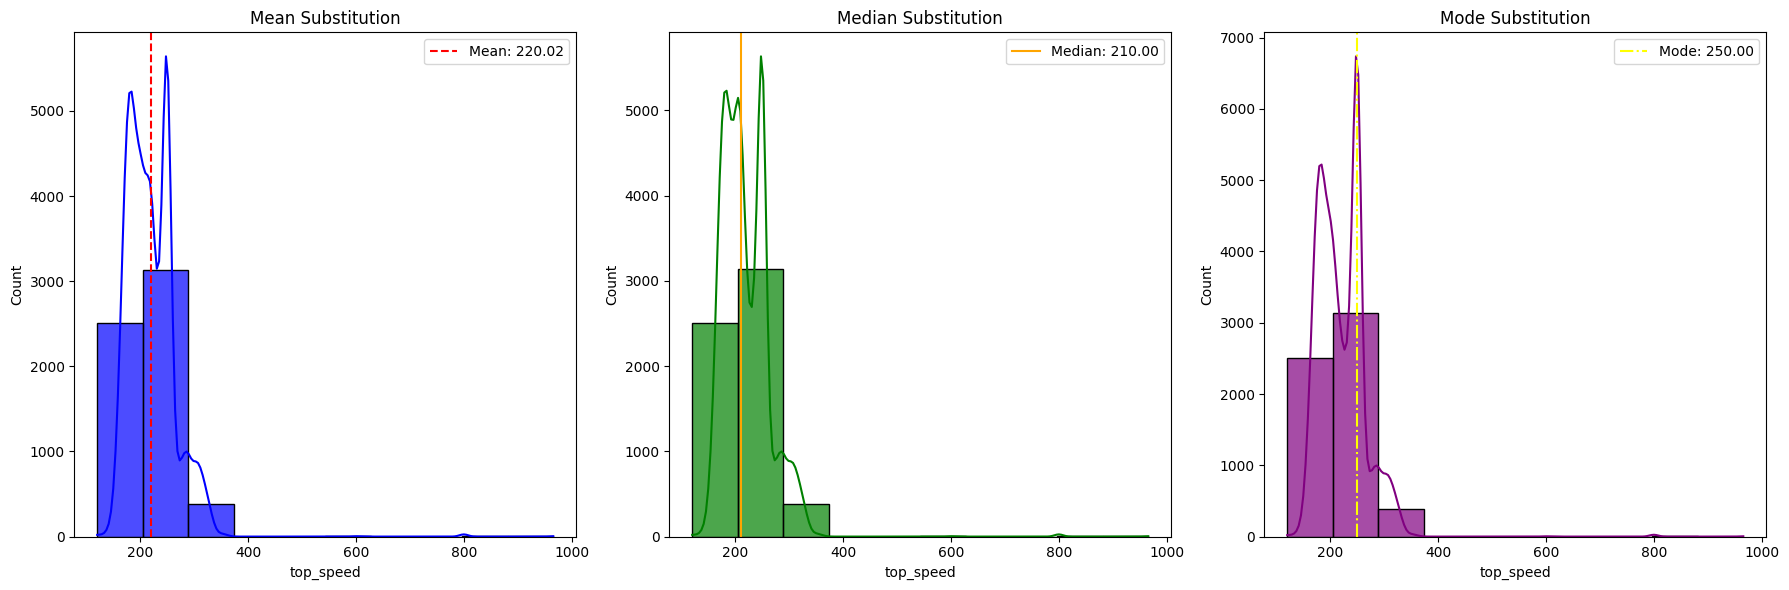

Statistics after Mean Substitution:
count    6034.000000
mean      220.018078
std        44.970495
min       120.000000
25%       185.000000
50%       216.000000
75%       250.000000
max       966.000000
Name: top_speed, dtype: float64

Statistics after Median Substitution:
count    6034.000000
mean      219.551541
std        45.020021
min       120.000000
25%       185.000000
50%       210.000000
75%       250.000000
max       966.000000
Name: top_speed, dtype: float64

Statistics after Mode Substitution:
count    6034.000000
mean      221.414319
std        45.412163
min       120.000000
25%       185.000000
50%       216.000000
75%       250.000000
max       966.000000
Name: top_speed, dtype: float64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to convert non-numeric values to NaN and clean the 'top_speed' column
def clean_top_speed(value):
    try:
        # Try to convert the value to numeric (will return NaN for non-numeric values)
        return pd.to_numeric(value, errors='coerce')
    except:
        return np.nan

# Create separate copies of the dataset for each imputation method
df_cleaned = df.copy()

# Clean the 'top_speed' column by replacing non-numeric values with NaN
df_cleaned['top_speed'] = df_cleaned['top_speed'].apply(clean_top_speed)

# Calculate mean, median, and mode for the 'top_speed' column
mean_top_speed = df_cleaned['top_speed'].mean()
median_top_speed = df_cleaned['top_speed'].median()
mode_top_speed = df_cleaned['top_speed'].mode()[0]

# Create separate copies for each imputation method
df_mean = df_cleaned.copy()
df_median = df_cleaned.copy()
df_mode = df_cleaned.copy()

# Impute missing values in each copy using mean, median, and mode
df_mean['top_speed'] = df_mean['top_speed'].fillna(mean_top_speed)
df_median['top_speed'] = df_median['top_speed'].fillna(median_top_speed)
df_mode['top_speed'] = df_mode['top_speed'].fillna(mode_top_speed)

# Plot the distributions for each imputation method
plt.figure(figsize=(18, 6))

# Distribution after mean substitution
plt.subplot(1, 3, 1)
sns.histplot(df_mean['top_speed'], kde=True, bins=10, color='blue', alpha=0.7)
plt.title("Mean Substitution")
plt.axvline(mean_top_speed, color='red', linestyle='--', label=f"Mean: {mean_top_speed:.2f}")
plt.legend()

# Distribution after median substitution
plt.subplot(1, 3, 2)
sns.histplot(df_median['top_speed'], kde=True, bins=10, color='green', alpha=0.7)
plt.title("Median Substitution")
plt.axvline(median_top_speed, color='orange', linestyle='-', label=f"Median: {median_top_speed:.2f}")
plt.legend()

# Distribution after mode substitution
plt.subplot(1, 3, 3)
sns.histplot(df_mode['top_speed'], kde=True, bins=10, color='purple', alpha=0.7)
plt.title("Mode Substitution")
plt.axvline(mode_top_speed, color='yellow', linestyle='-.', label=f"Mode: {mode_top_speed:.2f}")
plt.legend()

plt.tight_layout()
plt.show()

# Print the updated statistics for each case
print("Statistics after Mean Substitution:")
print(df_mean['top_speed'].describe())

print("\nStatistics after Median Substitution:")
print(df_median['top_speed'].describe())

print("\nStatistics after Mode Substitution:")
print(df_mode['top_speed'].describe())


In [ ]:
import pandas as pd
import numpy as np

# Function to convert non-numeric values to NaN
def clean_top_speed(value):
    try:
        # Try to convert the value to numeric (will return NaN for non-numeric values)
        return pd.to_numeric(value, errors='coerce')
    except:
        return np.nan

# Clean the 'top_speed' column in the original dataframe by replacing non-numeric values with NaN
df['top_speed'] = df['top_speed'].apply(clean_top_speed)

# Calculate the median of the 'top_speed' column
median_top_speed = df['top_speed'].median()

# Replace NaN values with the median in the 'top_speed' column
df['top_speed'] = df['top_speed'].fillna(median_top_speed)

# Print the updated distinct values in 'top_speed' to confirm
distinct_top_speed = df['top_speed'].unique()
print("Distinct values in 'top_speed' after cleaning:")
print(distinct_top_speed)


Distinct values in 'top_speed' after cleaning:
[210. 145. 190. 170. 199. 200. 180. 322. 300. 250. 312. 181. 216. 158.
 230. 172. 220. 240. 184. 350. 175. 185. 140. 243. 310. 254. 165. 270.
 227. 206. 228. 360. 160. 205. 275. 304. 289. 222. 236. 286. 280. 217.
 283. 328. 302. 235. 207. 316. 305. 245. 800. 192. 173. 168. 320. 208.
 325. 215. 183. 169. 193. 178. 161. 209. 194. 182. 198. 162. 167. 239.
 195. 188. 219. 155. 150. 189. 244. 187. 226. 197. 211. 196. 234. 237.
 191. 218. 238. 225. 281. 285. 272. 290. 267. 251. 293. 264. 265. 253.
 249. 301. 299. 291. 263. 288. 306. 308. 315. 314. 278. 600. 318. 323.
 317. 330. 333. 292. 296. 201. 130. 176. 166. 212. 213. 156. 261. 120.
 203. 202. 224. 204. 233. 241. 246. 177. 260. 326. 303. 295. 242. 171.
 186. 232. 266. 274. 335. 248. 229. 279. 259. 307. 255. 258. 966. 324.]


In [ ]:
# Get the distinct values in the 'engine_capacity' column
distinct_seats = df['seats'].unique()

# Print the distinct values
print("Distinct values in 'seats':")
print(distinct_seats)

Distinct values in 'seats':
['8.8' '4 Seater' '7.5' '5 Seater' 'N A' '6.9' '7 Seater' '5.5' '7.7'
 '2 Seater' '10.5' '7.8' '15' '10.7' '5.6' '11' 'Automatic' '6 Seater'
 '6.5' '3 Seater' '6.8' '3.2' '11.0' '5.2' '7.3' '7.2' '9 Seater'
 '8 Seater' '11.1' '10.0' '15 Seater' '17.0' '17.5' '18 Seater' '6.0'
 '4.7' '9.4' '3.5' '4.4' '11.5' '12.5' '14 Seater' '12 Seater' '15.6' '12'
 '12.3' '30.5' '24.1' '4.5' '5.3' '4.1' '15.0' '6.6' '3.7' '3.8' '14.0'
 '10.4' '9.3' '13 Seater' '6.2']


In [ ]:
# Identify rows containing the string 'Seater'
seater_rows = df['seats'].str.contains('Seater', na=False)

# Count and percentage
count_seater = seater_rows.sum()  # Total rows with 'Seater'
percentage_seater = (count_seater / len(df)) * 100  # Percentage

# Print the results
print(f"Number of rows containing 'Seater': {count_seater}")
print(f"Percentage of rows containing 'Seater': {percentage_seater:.2f}%")

Number of rows containing 'Seater': 5662
Percentage of rows containing 'Seater': 93.83%


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6034 entries, 1 to 6307
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   car name                 6034 non-null   object 
 1   price                    6034 non-null   object 
 2   horse_power              6034 non-null   float64
 3   top_speed                6034 non-null   float64
 4   seats                    6034 non-null   object 
 5   brand                    6034 non-null   object 
 6   country                  6034 non-null   object 
 7   engine_capacity_cleaned  6034 non-null   float64
 8   cylinder_encoded         6034 non-null   float64
dtypes: float64(4), object(5)
memory usage: 471.4+ KB


In [ ]:
# Number of rows containing the string "seaters" (case-insensitive)
seaters_rows = df['seats'].str.contains('Seater', case=False, na=False)
num_seaters = seaters_rows.sum()
percentage_seaters = (num_seaters / df.shape[0]) * 100

# Convert 'seats' column to numeric, coercing errors to NaN for invalid values
seats_numeric = pd.to_numeric(df['seats'], errors='coerce')

# Filter rows with numeric values in the range 2 to 30
valid_range_rows = (seats_numeric >= 2) & (seats_numeric <= 30)
num_valid_range = valid_range_rows.sum()
percentage_valid_range = (num_valid_range / df.shape[0]) * 100

# Print the results
print(f"Number of rows with 'seaters': {num_seaters}")
print(f"Percentage of rows with 'seaters': {percentage_seaters:.2f}%")
print(f"Number of rows with numeric seats in the range 2 to 30: {num_valid_range}")
print(f"Percentage of rows with numeric seats in the range 2 to 30: {percentage_valid_range:.2f}%")

Number of rows with 'seaters': 5662
Percentage of rows with 'seaters': 93.83%
Number of rows with numeric seats in the range 2 to 30: 278
Percentage of rows with numeric seats in the range 2 to 30: 4.61%


In [ ]:
import pandas as pd
import numpy as np

# Define a function to clean the 'seats' column
def clean_seats(seats):
    try:
        # Extract numeric part from strings like "4 Seater"
        if isinstance(seats, str):
            if 'Seater' in seats:
                return int(seats.split()[0])
            elif seats.replace('.', '', 1).isdigit():  # Check for float-like strings
                return float(seats)
        # Convert numeric strings to float directly
        if isinstance(seats, (int, float)):
            return seats
        # Mark invalid entries as NaN
        return np.nan
    except ValueError:
        return np.nan

# Clean the 'seats' column directly in the original dataset (update the original column)
df['seats'] = df['seats'].apply(clean_seats)

# Replace invalid and non-relevant entries with NaN explicitly
df['seats'] = df['seats'].apply(lambda x: np.nan if x is None or not (2 <= x <= 30) else x)

# Ensure that rounding does not produce NaN values
df['seats'] = df['seats'].apply(lambda x: np.nan if pd.isna(x) else round(x))

# Drop rows with NaN in 'seats' (this is now applied to df directly)
df.dropna(subset=['seats'], inplace=True)

# Optionally, save the cleaned data if needed
#df.to_csv('cleaned_cars_data.csv', index=False)

# Get the distinct values in the 'seats' column after cleaning
distinct_seats = df['seats'].unique()

# Print the distinct values
print("Distinct values in 'seats':")
print(distinct_seats)

# Output a preview of the cleaned data
print(df.head())


Distinct values in 'seats':
[ 9.  4.  8.  5.  7.  6.  2. 10. 15. 11.  3. 17. 18. 12. 14. 16. 24. 13.]
                           car name                 price  horse_power  \
1     Peugeot Traveller 2021 L3 VIP           SAR 140,575        180.0   
2  Suzuki Jimny 2021 1.5L Automatic            SAR 98,785        102.0   
3    Ford Bronco 2021 2.3T Big Bend           SAR 198,000        420.0   
4     Honda HR-V 2021 1.8 i-VTEC LX  Orangeburst Metallic        140.0   
5     Honda HR-V 2021 1.8 i-VTEC EX            SAR 95,335        140.0   

   top_speed  seats    brand country  engine_capacity_cleaned  \
1      210.0    9.0  peugeot     ksa                      2.0   
2      145.0    4.0   suzuki     ksa                      1.5   
3      210.0    8.0     ford     ksa                      2.3   
4      190.0    5.0    honda     ksa                      1.8   
5      190.0    5.0    honda     ksa                      1.8   

   cylinder_encoded  
1               4.0  
2               3.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5940 entries, 1 to 6307
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   car name                 5940 non-null   object 
 1   price                    5940 non-null   object 
 2   horse_power              5940 non-null   float64
 3   top_speed                5940 non-null   float64
 4   seats                    5940 non-null   float64
 5   brand                    5940 non-null   object 
 6   country                  5940 non-null   object 
 7   engine_capacity_cleaned  5940 non-null   float64
 8   cylinder_encoded         5940 non-null   float64
dtypes: float64(5), object(4)
memory usage: 464.1+ KB


In [ ]:
# Get the distinct values in the 'engine_capacity' column
distinct_brand = df['brand'].unique()

# Print the distinct values
print("Distinct values in 'brand':")
print(distinct_brand)

Distinct values in 'brand':
['peugeot' 'suzuki' 'ford' 'honda' 'renault' 'gac' 'aston-martin'
 'genesis' 'hyundai' 'toyota' 'lincoln' 'mg' 'chevrolet' 'kia' 'volvo'
 'nissan' 'changan' 'great-wall' 'mercedes-benz' 'bmw' 'audi' 'infiniti'
 'ram' 'chrysler' 'porsche' 'gmc' 'borgward' 'mini' 'jeep' 'alfa-romeo'
 'chery' 'mclaren' 'land-rover' 'skoda' 'lamborghini' 'lexus' 'maxus'
 'mazda' 'bestune' 'jetour' 'hongqi' 'ferrari' 'volkswagen' 'maserati'
 'geely' 'mitsubishi' 'byd' 'fiat' 'Foton' 'subaru' 'haval' 'isuzu'
 'ssang-yong' 'dodge' 'cadillac' 'jaguar' 'bentley' 'rolls-royce' 'opel'
 'dorcen' 'citroen' 'brilliance' 'seat' 'proton' 'ds' 'jac' 'kinglong'
 'baic' 'lotus' 'morgan' 'mahindra' 'tata' 'dfm' 'acura' 'abarth' 'zna'
 'zotye' 'tesla']


In [ ]:
# Get the distinct values in the 'engine_capacity' column
distinct_country = df['country'].unique()

# Print the distinct values
print("Distinct values in 'country':")
print(distinct_country)

Distinct values in 'country':
['ksa' 'egypt' 'bahrain' 'qatar' 'oman' 'kuwait' 'uae']


In [ ]:
# Extract the currency part (the prefix) from the 'price' column
df['currency'] = df['price'].str.split().str[0]

# Get the distinct currencies
distinct_currencies = df['currency'].dropna().unique()

# Print the number of unique currencies
print(f"Number of distinct currencies used in 'price': {len(distinct_currencies)}")

Number of distinct currencies used in 'price': 83


In [ ]:
import numpy as np

# Mapping of currency prefixes to USD conversion rates
currency_to_usd = {
    'SAR': 0.27,  # Saudi Riyal
    'AED': 0.27,  # UAE Dirham
    'OMR': 2.60,  # Omani Rial
    'QAR': 0.27,  # Qatari Riyal
    'KWD': 3.26,  # Kuwaiti Dinar
    'BHD': 2.65,  # Bahraini Dinar
    'USD': 1.00,  # US Dollar
    'EGP': 0.032  # Egyptian Pound
}

# Function to clean and convert the price
def clean_and_convert_price(value):
    if isinstance(value, str):
        # Extract the currency prefix
        prefix = ''.join(char for char in value if not char.isdigit() and char != ',' and char != '.').strip()
        # Extract the numeric part
        numeric_value = ''.join(char for char in value if char.isdigit() or char == '.')
        if prefix in currency_to_usd:
            # Convert to float and apply the conversion rate
            return float(numeric_value) * currency_to_usd[prefix] if numeric_value else np.nan
    return np.nan  # Replace invalid entries with NaN

# Apply cleaning and conversion to the 'price' column
df['price_usd'] = df['price'].apply(clean_and_convert_price)

# Calculate the percentage of rows that will be dropped
invalid_percentage = df['price_usd'].isna().mean() * 100
print(f"Percentage of invalid entries to be dropped: {invalid_percentage:.2f}%")


# Check the cleaned dataset
print(df[['price', 'price_usd']].head())


Percentage of invalid entries to be dropped: 19.93%
                  price  price_usd
1           SAR 140,575   37955.25
2            SAR 98,785   26671.95
3           SAR 198,000   53460.00
4  Orangeburst Metallic        NaN
5            SAR 95,335   25740.45


In [ ]:
# Importing necessary libraries
import pandas as pd

# Calculate mean, median, and mode
mean_price = df['price_usd'].mean()
median_price = df['price_usd'].median()
mode_price = df['price_usd'].mode()[0]  # mode() returns a Series, we take the first mode value

# Print the results
print(f"Mean Price: {mean_price:.2f}")
print(f"Median Price: {median_price:.2f}")
print(f"Mode Price: {mode_price}")


Mean Price: 64841.33
Median Price: 46437.38
Mode Price: 26080.0


In [ ]:
# Replace NaN values in 'price' column with the median price
df['price_usd'].fillna(median_price, inplace=True)


<ipython-input-422-4606ddf2880f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price_usd'].fillna(median_price, inplace=True)


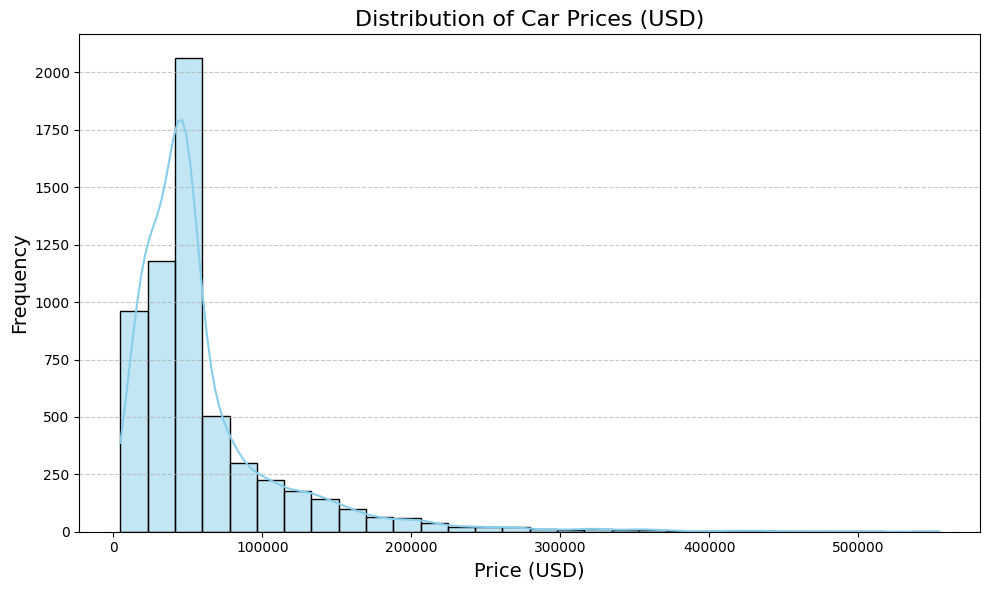

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of prices in USD
plt.figure(figsize=(10, 6))

# Histogram with KDE
sns.histplot(df['price_usd'], kde=True, bins=30, color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Distribution of Car Prices (USD)', fontsize=16)
plt.xlabel('Price (USD)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


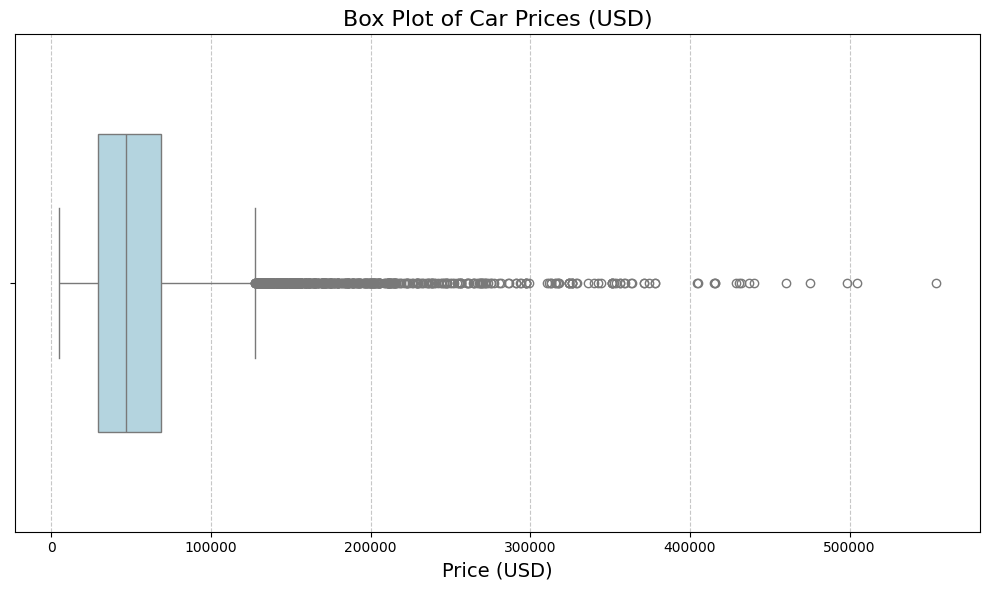

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot for car prices
plt.figure(figsize=(10, 6))

# Box plot
sns.boxplot(x=df['price_usd'], color='lightblue', width=0.6)

# Add labels and title
plt.title('Box Plot of Car Prices (USD)', fontsize=16)
plt.xlabel('Price (USD)', fontsize=14)

# Show the plot
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Calculate the 95th percentile of the price data
percentile_95 = df['price_usd'].quantile(0.95)

# Calculate the percentage of prices greater than the 95th percentile
percent_above_95 = (df['price_usd'] > percentile_95).mean() * 100

# Print the result
print(f"Percentage of prices above the 95th percentile: {percent_above_95:.2f}%")


Percentage of prices above the 95th percentile: 5.00%


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5940 entries, 1 to 6307
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   car name                 5940 non-null   object 
 1   price                    5940 non-null   object 
 2   horse_power              5940 non-null   float64
 3   top_speed                5940 non-null   float64
 4   seats                    5940 non-null   float64
 5   brand                    5940 non-null   object 
 6   country                  5940 non-null   object 
 7   engine_capacity_cleaned  5940 non-null   float64
 8   cylinder_encoded         5940 non-null   float64
 9   currency                 5940 non-null   object 
 10  price_usd                5940 non-null   float64
dtypes: float64(6), object(5)
memory usage: 556.9+ KB


In [ ]:
df.describe()

,horse_power,top_speed,seats,engine_capacity_cleaned,cylinder_encoded,price_usd
count,5940.000000,5940.000000,5940.000000,5940.000000,5940.000000,5940.000000
mean,282.116162,219.075084,5.201010,2.851989,4.856734,61172.933482
std,137.751458,39.696102,1.803067,1.286824,1.800221,54697.813292
min,65.000000,120.000000,2.000000,0.000000,0.000000,4608.000000
25%,168.000000,185.000000,5.000000,2.000000,4.000000,29005.747500
50%,254.000000,210.000000,5.000000,2.500000,4.000000,46437.375000
75%,365.000000,250.000000,5.000000,3.500000,6.000000,68431.132500
max,650.000000,350.000000,24.000000,6.800000,12.000000,554200.000000


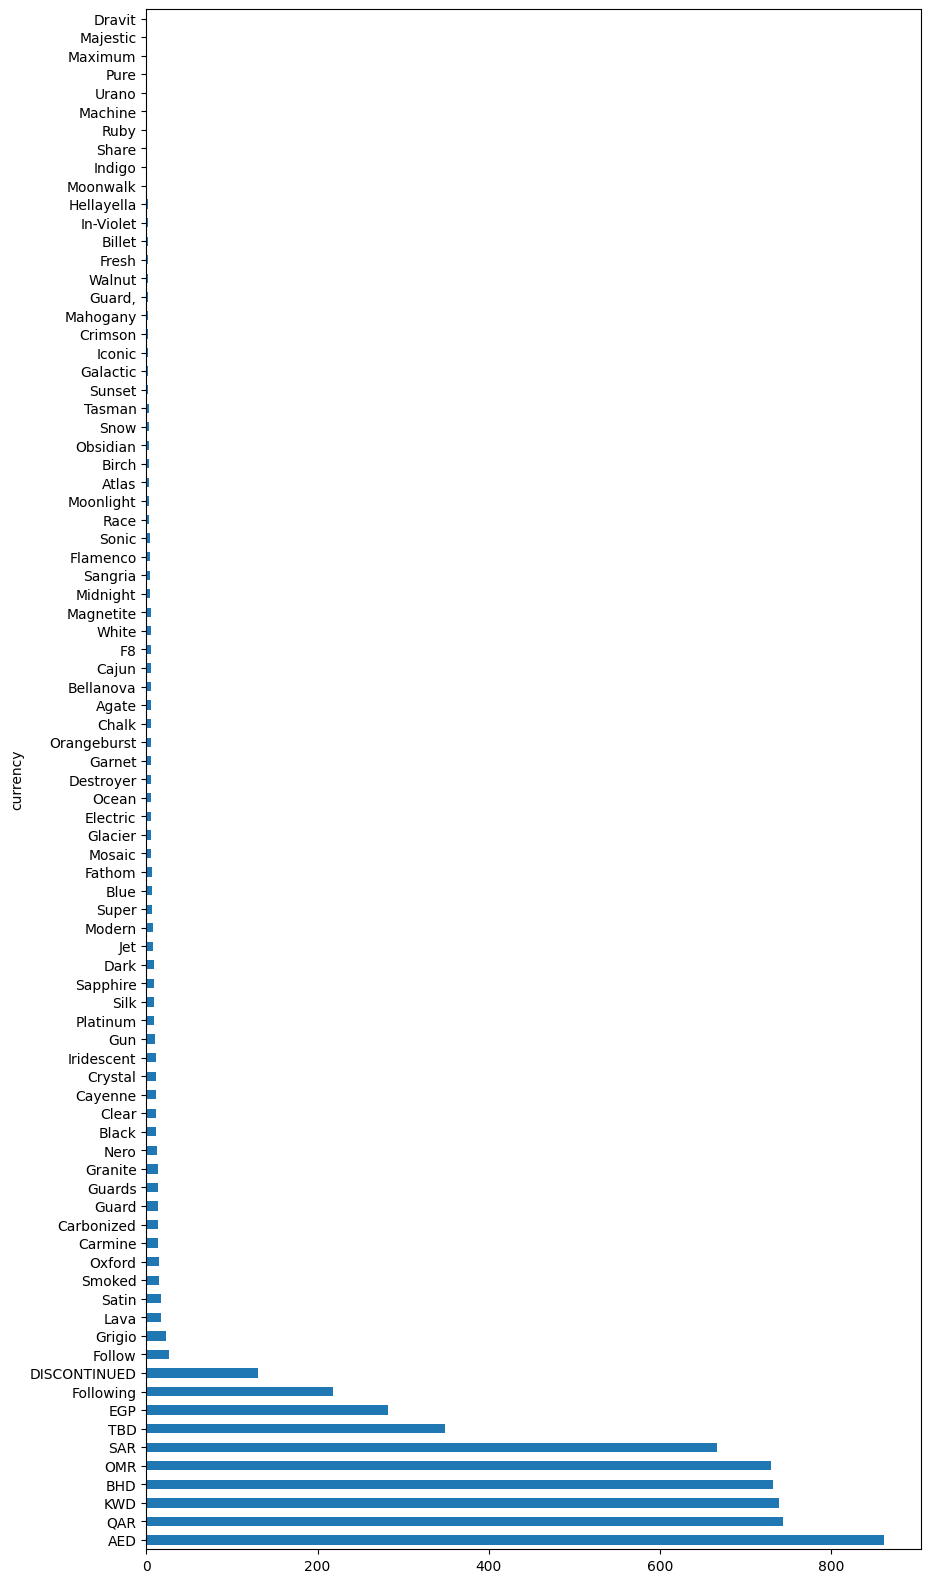

In [ ]:
 df['currency'].value_counts().plot.barh(figsize=(10,20));

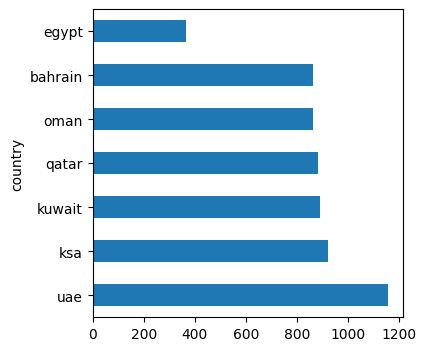

In [ ]:
df['country'].value_counts().plot.barh(figsize=(4,4));

# Normalization and Encoding

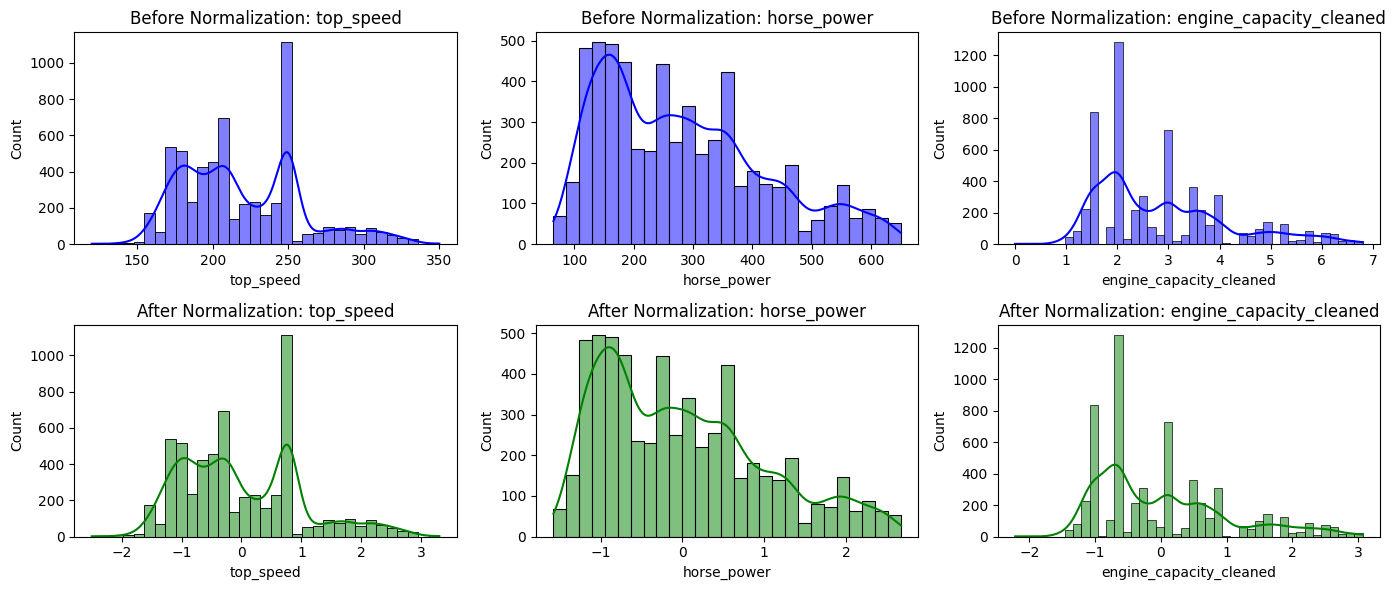

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Assuming you have a dataframe `df`
features_to_normalize = ['top_speed', 'horse_power', 'engine_capacity_cleaned']

# Initialize the Z-Score scaler
z_score_scaler = StandardScaler()

# Plot before normalization
plt.figure(figsize=(14, 6))
for i, feature in enumerate(features_to_normalize, 1):
    plt.subplot(2, len(features_to_normalize), i)
    sns.histplot(df[feature], kde=True, color='blue')
    plt.title(f'Before Normalization: {feature}')

    # Apply Z-Score normalization directly to the original dataframe
    df[feature] = z_score_scaler.fit_transform(df[feature].values.reshape(-1, 1))

    # Plot after normalization
    plt.subplot(2, len(features_to_normalize), i + len(features_to_normalize))
    sns.histplot(df[feature], kde=True, color='green')
    plt.title(f'After Normalization: {feature}')

plt.tight_layout()
plt.show()

# Now, df contains the normalized values for 'top_speed', 'horse_power', and 'engine_capacity'


for target variable, Some models, especially linear models (like Linear Regression, LASSO, or Ridge) and neural networks, may benefit from normalization because they perform better when the target and features are on similar scales.

Log Transformation: If the price distribution is skewed (i.e., has extreme outliers), you can apply a log transformation (logarithmic normalization) to make the distribution more normal and reduce the influence of outliers.<Br>
You could use Z-score or Min-Max scaling if you want to normalize the price for algorithms that are sensitive to scale, but log transformation is often more suitable for financial data, as it helps with skewed distribution

In [ ]:
df.describe()

,horse_power,top_speed,seats,engine_capacity_cleaned,cylinder_encoded,price_usd
count,5.940000e+03,5.940000e+03,5940.000000,5.940000e+03,5940.000000,5940.000000
mean,8.612639e-17,-2.918728e-16,5.201010,1.483288e-16,4.856734,61172.933482
std,1.000084e+00,1.000084e+00,1.803067,1.000084e+00,1.800221,54697.813292
min,-1.576277e+00,-2.496049e+00,2.000000,-2.216488e+00,0.000000,4608.000000
25%,-8.284905e-01,-8.584710e-01,5.000000,-6.621425e-01,4.000000,29005.747500
50%,-2.041251e-01,-2.286332e-01,5.000000,-2.735562e-01,4.000000,46437.375000
75%,6.017418e-01,7.791072e-01,5.000000,5.036166e-01,6.000000,68431.132500
max,2.670860e+00,3.298458e+00,24.000000,3.068287e+00,12.000000,554200.000000


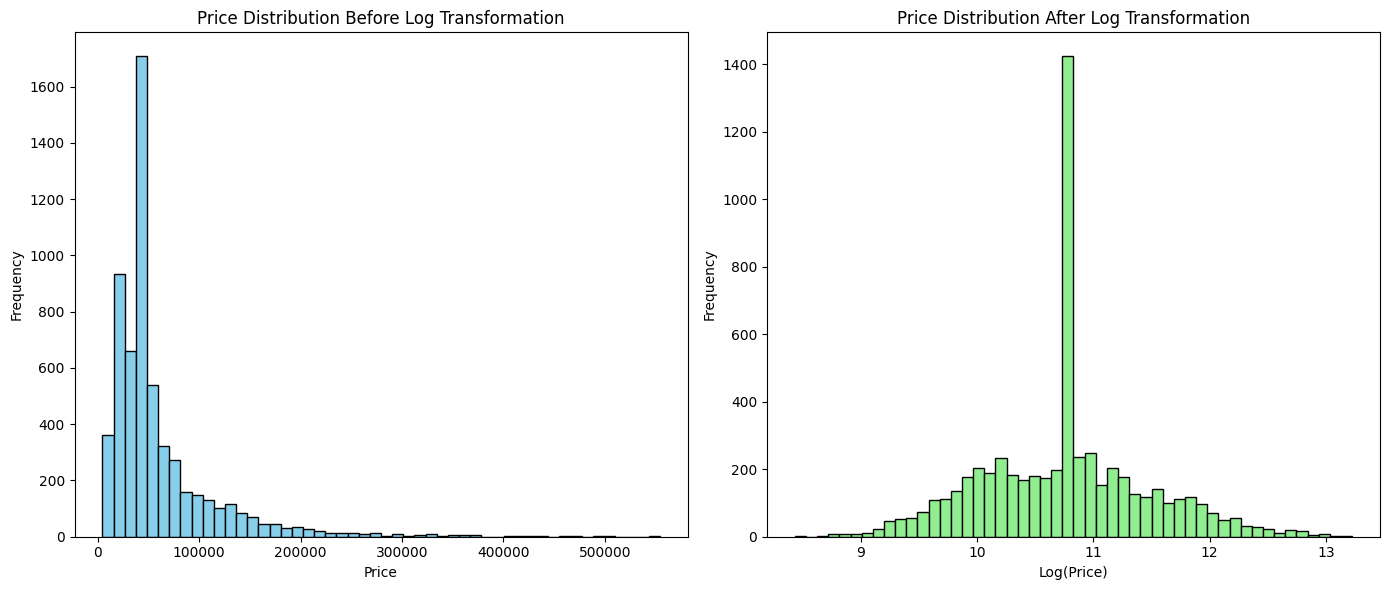

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a DataFrame `df` with a 'price' column

# Create a new column for the log-transformed price
df['log_price'] = np.log(df['price_usd'])

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot the original price distribution
ax[0].hist(df['price_usd'].dropna(), bins=50, color='skyblue', edgecolor='black')
ax[0].set_title('Price Distribution Before Log Transformation')
ax[0].set_xlabel('Price')
ax[0].set_ylabel('Frequency')

# Plot the log-transformed price distribution
ax[1].hist(df['log_price'].dropna(), bins=50, color='lightgreen', edgecolor='black')
ax[1].set_title('Price Distribution After Log Transformation')
ax[1].set_xlabel('Log(Price)')
ax[1].set_ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()


the log transformation made the distribution of the price variable more uniform and reduced the effect of extreme outliers, which can improve the performance of regression models.

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# # Initialize the label encoder
# label_encoder = LabelEncoder()

# # List of features to encode
# features_to_encode = ['car name', 'brand', 'country']

# # Apply label encoding to each feature
# for feature in features_to_encode:
#     df[feature + '_encoded'] = label_encoder.fit_transform(df[feature])

# # Drop the original columns
# df.drop(columns=features_to_encode, inplace=True)

# # Check the dataset after encoding and dropping the original columns
# print(df[['car name_encoded', 'brand_encoded', 'country_encoded']].head())


In [ ]:
!pip install category_encoders


In [ ]:
import category_encoders as ce

# List of features to encode
features_to_encode = ['car name', 'brand', 'country']

# Initialize the TargetEncoder
target_encoder = ce.TargetEncoder(cols=features_to_encode)

# Fit the encoder on the data and transform the specified columns
df[features_to_encode] = target_encoder.fit_transform(df[features_to_encode], df['log_price'])

# Rename columns to add '_encoded' to each feature name
df.rename(columns={feature: feature + '_encoded' for feature in features_to_encode}, inplace=True)

# Check the dataset after target encoding and renaming columns
print(df[['car name_encoded', 'brand_encoded', 'country_encoded']].head())


   car name_encoded  brand_encoded  country_encoded
1         10.714301      10.081553        10.797943
2         10.630491       9.583443        10.797943
3         10.757631      10.590336        10.797943
4         10.749235      10.550856        10.797943
5         10.613096      10.550856        10.797943


# Building Regression Models

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5940 entries, 1 to 6307
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   car name_encoded         5940 non-null   float64
 1   price                    5940 non-null   object 
 2   horse_power              5940 non-null   float64
 3   top_speed                5940 non-null   float64
 4   seats                    5940 non-null   float64
 5   brand_encoded            5940 non-null   float64
 6   country_encoded          5940 non-null   float64
 7   engine_capacity_cleaned  5940 non-null   float64
 8   cylinder_encoded         5940 non-null   float64
 9   currency                 5940 non-null   object 
 10  price_usd                5940 non-null   float64
 11  log_price                5940 non-null   float64
dtypes: float64(10), object(2)
memory usage: 603.3+ KB


In [ ]:
# Drop the specified columns
df = df.drop(columns=["price", "price_usd", "currency"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5940 entries, 1 to 6307
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   car name_encoded         5940 non-null   float64
 1   horse_power              5940 non-null   float64
 2   top_speed                5940 non-null   float64
 3   seats                    5940 non-null   float64
 4   brand_encoded            5940 non-null   float64
 5   country_encoded          5940 non-null   float64
 6   engine_capacity_cleaned  5940 non-null   float64
 7   cylinder_encoded         5940 non-null   float64
 8   log_price                5940 non-null   float64
dtypes: float64(9)
memory usage: 464.1 KB


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame
train_set, temp_set = train_test_split(df, test_size=0.4, random_state=42)
val_set, test_set = train_test_split(temp_set, test_size=0.5, random_state=42)

# Check the number of rows in each set
print(f"Training set size: {len(train_set)}")
print(f"Validation set size: {len(val_set)}")
print(f"Test set size: {len(test_set)}")

Training set size: 3564
Validation set size: 1188
Test set size: 1188


linear regression with forward selection

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Define features and target
features = ['horse_power', 'top_speed', 'seats', 'engine_capacity_cleaned',
            'cylinder_encoded', 'car name_encoded', 'brand_encoded', 'country_encoded']
target = 'log_price'

# Training, validation, and testing sets (assuming already split)
X_train = train_set[features]
y_train = train_set[target]
X_val = val_set[features]
y_val = val_set[target]
X_test = test_set[features]
y_test = test_set[target]

# Initialize variables for forward selection
remaining_features = features.copy()
selected_features = []
best_mse = float('inf')
metrics = []

# Baseline Model: Predict the mean of the target (log_price)
baseline_pred = np.mean(y_train)
baseline_mse = mean_squared_error(y_val, [baseline_pred] * len(y_val))
baseline_mae = mean_absolute_error(y_val, [baseline_pred] * len(y_val))
baseline_r2 = r2_score(y_val, [baseline_pred] * len(y_val))

print("Baseline Model (Zero Features):")
print(f"MSE: {baseline_mse:.4f}")
print(f"MAE: {baseline_mae:.4f}")
print(f"R-squared: {baseline_r2:.4f}\n")

# Store baseline metrics
metrics.append({
    'Feature Added': 'None (Baseline)',
    'MSE': baseline_mse,
    'MAE': baseline_mae,
    'R-squared': baseline_r2
})

# Forward Selection Process
while remaining_features:
    best_feature = None
    for feature in remaining_features:
        current_features = selected_features + [feature]
        model = LinearRegression()
        model.fit(X_train[current_features], y_train)
        y_val_pred = model.predict(X_val[current_features])
        mse = mean_squared_error(y_val, y_val_pred)

        if mse < best_mse:
            best_mse = mse
            best_feature = feature
            best_mae = mean_absolute_error(y_val, y_val_pred)
            best_r2 = r2_score(y_val, y_val_pred)

    if best_feature:
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
        metrics.append({
            'Feature Added': best_feature,
            'MSE': best_mse,
            'MAE': best_mae,
            'R-squared': best_r2
        })
        print(f"Feature Added: {best_feature}")
        print(f"MSE: {best_mse:.4f}, MAE: {best_mae:.4f}, R-squared: {best_r2:.4f}")
    else:
        break

# Store metrics in a DataFrame for analysis
metrics_df = pd.DataFrame(metrics)
print("\nFinal Metrics After Forward Selection:")
print(metrics_df)

# Retrain the final best model with selected features
print("\nRetraining the best model with selected features...")
best_model = LinearRegression()
best_model.fit(X_train[selected_features], y_train)

# Prepare test data (assuming X_test and y_test are already defined)
X_test_selected = X_test[selected_features]

# Predict on the test set
y_test_pred = best_model.predict(X_test_selected)

# Evaluate the model on the test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print out the test set evaluation metrics
print("\nTest Set Evaluation Metrics:")
print(f"MSE: {test_mse:.4f}")
print(f"MAE: {test_mae:.4f}")
print(f"R-squared: {test_r2:.4f}")


Baseline Model (Zero Features):
MSE: 0.5463
MAE: 0.5443
R-squared: -0.0000

Feature Added: car name_encoded
MSE: 0.0344, MAE: 0.1190, R-squared: 0.9371
Feature Added: country_encoded
MSE: 0.0328, MAE: 0.1126, R-squared: 0.9400
Feature Added: top_speed
MSE: 0.0326, MAE: 0.1129, R-squared: 0.9403
Feature Added: engine_capacity_cleaned
MSE: 0.0325, MAE: 0.1126, R-squared: 0.9405
Feature Added: brand_encoded
MSE: 0.0324, MAE: 0.1127, R-squared: 0.9406
Feature Added: cylinder_encoded
MSE: 0.0324, MAE: 0.1127, R-squared: 0.9406

Final Metrics After Forward Selection:
             Feature Added       MSE       MAE  R-squared
0          None (Baseline)  0.546274  0.544300  -0.000048
1         car name_encoded  0.034368  0.118966   0.937084
2          country_encoded  0.032757  0.112585   0.940032
3                top_speed  0.032636  0.112860   0.940255
4  engine_capacity_cleaned  0.032496  0.112569   0.940511
5            brand_encoded  0.032439  0.112735   0.940615
6         cylinder_encoded

In [ ]:
correlation = train_set[['horse_power', 'seats', 'log_price']].corr()
print(correlation)


             horse_power     seats  log_price
horse_power     1.000000 -0.146966   0.790280
seats          -0.146966  1.000000  -0.233555
log_price       0.790280 -0.233555   1.000000


In [ ]:
# Calculate correlations
correlations = df[['horse_power', 'engine_capacity_cleaned', 'top_speed']].corr()
print(correlations)


                         horse_power  engine_capacity_cleaned  top_speed
horse_power                 1.000000                 0.767137   0.696475
engine_capacity_cleaned     0.767137                 1.000000   0.350224
top_speed                   0.696475                 0.350224   1.000000


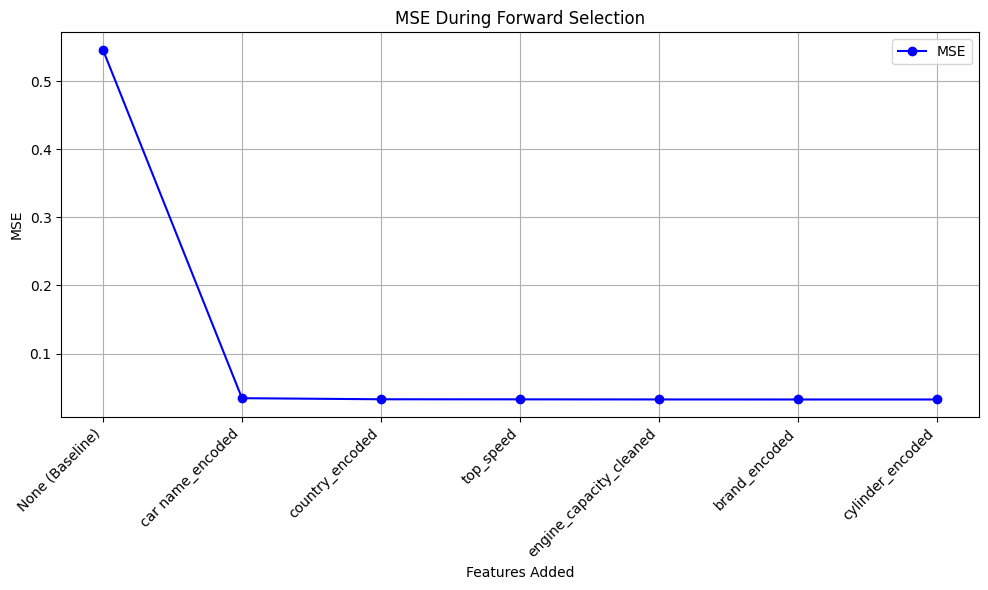

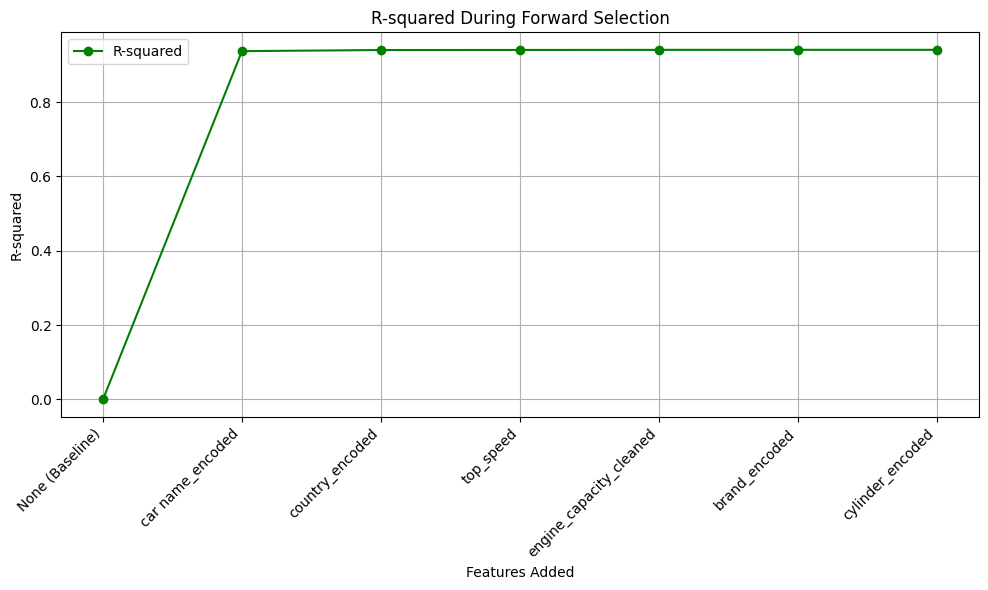

In [ ]:
import matplotlib.pyplot as plt

# Extract data for plotting
features_added = metrics_df['Feature Added']
mse_values = metrics_df['MSE']
mae_values = metrics_df['MAE']
r2_values = metrics_df['R-squared']

# Plot MSE
plt.figure(figsize=(10, 6))
plt.plot(features_added, mse_values, marker='o', label='MSE', color='blue')
plt.xlabel('Features Added')
plt.ylabel('MSE')
plt.title('MSE During Forward Selection')
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# Plot R-squared
plt.figure(figsize=(10, 6))
plt.plot(features_added, r2_values, marker='o', label='R-squared', color='green')
plt.xlabel('Features Added')
plt.ylabel('R-squared')
plt.title('R-squared During Forward Selection')
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
print("Features used during training:")
print(best_model.feature_names_in_)

print("\nFeatures in validation set:")
print(X_val[selected_features].columns.tolist())



Features used during training:
['car name_encoded' 'country_encoded' 'top_speed'
 'engine_capacity_cleaned' 'brand_encoded' 'cylinder_encoded']

Features in validation set:
['car name_encoded', 'country_encoded', 'top_speed', 'engine_capacity_cleaned', 'brand_encoded', 'cylinder_encoded']


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the features and target
selected_features = ['horse_power', 'top_speed', 'engine_capacity_cleaned', 'seats']
target = 'log_price'

# Training and validation datasets
X_train = train_set[selected_features]
y_train = train_set[target]
X_val = val_set[selected_features]
y_val = val_set[target]

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = model.predict(X_val)

# Calculate metrics
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

# Print results
print("Linear Regression Model with Selected Features:")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R-squared: {r2:.4f}")


Linear Regression Model with Selected Features:
MSE: 0.1677
MAE: 0.3262
R-squared: 0.6929


Non linear Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Range of degrees for polynomial regression
degrees = range(2, 11)

# Initialize lists to store the evaluation metrics for validation and test sets
mse_val_list = []
mae_val_list = []
r2_val_list = []

mse_test_list = []
mae_test_list = []
r2_test_list = []

# Loop through each degree
for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)

    # Fit and transform the training set
    X_train_poly = poly.fit_transform(X_train[selected_features])

    # Initialize and train the polynomial regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Transform the validation and test sets (using the same transformer)
    X_val_poly = poly.transform(X_val[selected_features])
    X_test_poly = poly.transform(X_test[selected_features])

    # Make predictions on the validation set
    y_val_pred = model.predict(X_val_poly)

    # Calculate evaluation metrics for validation set
    mse_val = mean_squared_error(y_val, y_val_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    r2_val = r2_score(y_val, y_val_pred)

    # Store the validation results
    mse_val_list.append(mse_val)
    mae_val_list.append(mae_val)
    r2_val_list.append(r2_val)

    # Make predictions on the test set
    y_test_pred = model.predict(X_test_poly)

    # Calculate evaluation metrics for test set
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Store the test results
    mse_test_list.append(mse_test)
    mae_test_list.append(mae_test)
    r2_test_list.append(r2_test)

    # Print the evaluation metrics for each degree
    print(f"Degree {degree}:")
    print(f"Validation MSE: {mse_val:.4f}, MAE: {mae_val:.4f}, R-squared: {r2_val:.4f}")
    print(f"Test MSE: {mse_test:.4f}, MAE: {mae_test:.4f}, R-squared: {r2_test:.4f}")
    print("-" * 40)

# Store the results in DataFrames for easy comparison
validation_results_df = pd.DataFrame({
    'Degree': degrees,
    'Validation MSE': mse_val_list,
    'Validation MAE': mae_val_list,
    'Validation R-squared': r2_val_list
})

test_results_df = pd.DataFrame({
    'Degree': degrees,
    'Test MSE': mse_test_list,
    'Test MAE': mae_test_list,
    'Test R-squared': r2_test_list
})

print("\nPolynomial Regression Model Validation Set Evaluation Metrics:")
print(validation_results_df)

print("\nPolynomial Regression Model Test Set Evaluation Metrics:")
print(test_results_df)


Degree 2:
Validation MSE: 0.1564, MAE: 0.3129, R-squared: 0.7136
Test MSE: 0.1723, MAE: 0.3246, R-squared: 0.6684
----------------------------------------
Degree 3:
Validation MSE: 0.1423, MAE: 0.2940, R-squared: 0.7395
Test MSE: 0.1647, MAE: 0.3117, R-squared: 0.6830
----------------------------------------
Degree 4:
Validation MSE: 0.1331, MAE: 0.2818, R-squared: 0.7564
Test MSE: 0.2523, MAE: 0.3075, R-squared: 0.5144
----------------------------------------
Degree 5:
Validation MSE: 0.1359, MAE: 0.2786, R-squared: 0.7513
Test MSE: 0.9066, MAE: 0.3124, R-squared: -0.7450
----------------------------------------
Degree 6:
Validation MSE: 0.7079, MAE: 0.2883, R-squared: -0.2959
Test MSE: 328.2180, MAE: 0.8144, R-squared: -630.7364
----------------------------------------
Degree 7:
Validation MSE: 12.0058, MAE: 0.3794, R-squared: -20.9786
Test MSE: 81135.6006, MAE: 8.6154, R-squared: -156164.4410
----------------------------------------
Degree 8:
Validation MSE: 2491.5920, MAE: 2.2549, 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

# Polynomial degrees to evaluate
degrees = list(range(2, 11))

# Store metrics for each polynomial degree
polynomial_metrics = []

# Evaluate polynomial models for each degree
for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train[features])
    X_val_poly = poly.transform(X_val[features])

    # Fit the polynomial model
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)

    # Predict and evaluate
    y_val_pred = poly_model.predict(X_val_poly)
    mse = mean_squared_error(y_val, y_val_pred)
    mae = mean_absolute_error(y_val, y_val_pred)
    r2 = r2_score(y_val, y_val_pred)

    # Print results for each degree
    print(f"Degree {degree}:")
    print(f"MSE: {mse:.4f}, MAE: {mae:.4f}, R-squared: {r2:.4f}")
    print("-" * 40)

    # Store metrics
    polynomial_metrics.append({
        'Degree': degree,
        'MSE': mse,
        'MAE': mae,
        'R-squared': r2
    })

# Create a DataFrame to display the metrics
polynomial_metrics_df = pd.DataFrame(polynomial_metrics)
print("\nPolynomial Regression Model Evaluation Metrics:")
print(polynomial_metrics_df)


Degree 2:
MSE: 0.0333, MAE: 0.1127, R-squared: 0.9390
----------------------------------------
Degree 3:
MSE: 0.0379, MAE: 0.1061, R-squared: 0.9307
----------------------------------------
Degree 4:
MSE: 0.0515, MAE: 0.1157, R-squared: 0.9057
----------------------------------------
Degree 5:
MSE: 7.4095, MAE: 0.3263, R-squared: -12.5643
----------------------------------------
Degree 6:
MSE: 2159087879290.5476, MAE: 44570.4067, R-squared: -3952578458697.5015
----------------------------------------
Degree 7:
MSE: 250789220386063.5625, MAE: 481824.0676, R-squared: -459112424130444.5000
----------------------------------------
Degree 8:
MSE: 17655898747907.3633, MAE: 154160.1279, R-squared: -32322132753053.7344
----------------------------------------
Degree 9:
MSE: 2931830086603.7886, MAE: 86712.8827, R-squared: -5367214811413.7539
----------------------------------------
Degree 10:
MSE: 3254850734686.7070, MAE: 93067.0779, R-squared: -5958559178437.3438
------------------------------

all features with test:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import pandas as pd

# Polynomial degrees to evaluate
degrees = list(range(2, 11))

# Store metrics for validation and test sets for each polynomial degree
polynomial_metrics = []

# Evaluate polynomial models for each degree
for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train[features])
    X_val_poly = poly.transform(X_val[features])
    X_test_poly = poly.transform(X_test[features])

    # Fit the polynomial model
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)

    # Predict and evaluate on validation set
    y_val_pred = poly_model.predict(X_val_poly)
    mse_val = mean_squared_error(y_val, y_val_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    r2_val = r2_score(y_val, y_val_pred)

    # Predict and evaluate on test set
    y_test_pred = poly_model.predict(X_test_poly)
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Print results for each degree
    print(f"Degree {degree}:")
    print(f"Validation Set -> MSE: {mse_val:.4f}, MAE: {mae_val:.4f}, R-squared: {r2_val:.4f}")
    print(f"Test Set -> MSE: {mse_test:.4f}, MAE: {mae_test:.4f}, R-squared: {r2_test:.4f}")
    print("-" * 40)

    # Store metrics
    polynomial_metrics.append({
        'Degree': degree,
        'Validation MSE': mse_val,
        'Validation MAE': mae_val,
        'Validation R-squared': r2_val,
        'Test MSE': mse_test,
        'Test MAE': mae_test,
        'Test R-squared': r2_test
    })

# Create a DataFrame to display the metrics
polynomial_metrics_df = pd.DataFrame(polynomial_metrics)
print("\nPolynomial Regression Model Evaluation Metrics (Validation and Test Sets):")
print(polynomial_metrics_df)


Degree 2:
Validation Set -> MSE: 0.0333, MAE: 0.1127, R-squared: 0.9390
Test Set -> MSE: 0.0322, MAE: 0.1107, R-squared: 0.9381
----------------------------------------
Degree 3:
Validation Set -> MSE: 0.0379, MAE: 0.1061, R-squared: 0.9307
Test Set -> MSE: 0.0345, MAE: 0.1038, R-squared: 0.9335
----------------------------------------
Degree 4:
Validation Set -> MSE: 0.0515, MAE: 0.1157, R-squared: 0.9057
Test Set -> MSE: 0.0870, MAE: 0.1173, R-squared: 0.8326
----------------------------------------
Degree 5:
Validation Set -> MSE: 7.4095, MAE: 0.3263, R-squared: -12.5643
Test Set -> MSE: 35.9551, MAE: 0.5919, R-squared: -68.2044
----------------------------------------
Degree 6:
Validation Set -> MSE: 2159087879290.5476, MAE: 44570.4067, R-squared: -3952578458697.5015
Test Set -> MSE: 3440304603252.4419, MAE: 78519.3896, R-squared: -6621713301400.8457
----------------------------------------
Degree 7:
Validation Set -> MSE: 250789220386063.5625, MAE: 481824.0676, R-squared: -4591124

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# Function to evaluate polynomial regression model on test set
def evaluate_polynomial_model_on_test(X_train, X_test, y_train, y_test, degree, selected_features=False):
    # Select features if needed
    if selected_features:
        X_train_selected = X_train[selected_features]
        X_test_selected = X_test[selected_features]
    else:
        X_train_selected = X_train
        X_test_selected = X_test

    # Apply polynomial feature transformation
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_selected)
    X_test_poly = poly.transform(X_test_selected)

    # Initialize and train polynomial regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict on the test set
    y_test_pred = model.predict(X_test_poly)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_test_pred)
    mae = mean_absolute_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)

    return mse, mae, r2

# Evaluate the model for different degrees (2 to 10) with all features
results = []
for degree in range(2, 11):
    mse, mae, r2 = evaluate_polynomial_model_on_test(X_train, X_test, y_train, y_test, degree, selected_features=False)
    results.append((degree, mse, mae, r2))

# Print results
print("Polynomial Regression Model Evaluation on Test Set:")
print("Degree\t\tMSE\t\t\tMAE\t\tR-squared")
for result in results:
    print(f"{result[0]}\t\t{result[1]:.6f}\t{result[2]:.6f}\t{result[3]:.6f}")


Polynomial Regression Model Evaluation on Test Set:
Degree		MSE			MAE		R-squared
2		0.032178	0.110651	0.938065
3		0.034531	0.103762	0.933536
4		0.086985	0.117348	0.832576
5		37.991961	0.611908	-72.124884
6		3530493101723.134277	79503.062535	-6795303273460.951172
7		1829989589207770.500000	1335202.575142	-3522265555447627.000000
8		245586781510160128.000000	14597761.239377	-472692230867258752.000000
9		27097031449944528.000000	4940420.514051	-52154909019094128.000000
10		41816262397932144.000000	6195840.885458	-80485693235861184.000000


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# Function to evaluate polynomial regression model on test set
def evaluate_polynomial_model_on_test(X_train, X_test, y_train, y_test, degree, selected_features=False):
    # Select features if needed
    if selected_features:
        X_train_selected = X_train[features]
        X_test_selected = X_test[features]
    else:
        X_train_selected = X_train
        X_test_selected = X_test

    # Apply polynomial feature transformation
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_selected)
    X_test_poly = poly.transform(X_test_selected)

    # Initialize and train polynomial regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict on the test set
    y_test_pred = model.predict(X_test_poly)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_test_pred)
    mae = mean_absolute_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)

    return mse, mae, r2

# Evaluate the model for different degrees (2 to 10) with all features
results = []
for degree in range(2, 11):
    mse, mae, r2 = evaluate_polynomial_model_on_test(X_train, X_test, y_train, y_test, degree, selected_features=False)
    results.append((degree, mse, mae, r2))

# Print results
print("Polynomial Regression Model Evaluation on Test Set:")
print("Degree\t\tMSE\t\t\tMAE\t\tR-squared")
for result in results:
    print(f"{result[0]}\t\t{result[1]:.6f}\t{result[2]:.6f}\t{result[3]:.6f}")


Polynomial Regression Model Evaluation on Test Set:
Degree		MSE			MAE		R-squared
2		0.032178	0.110651	0.938065
3		0.034531	0.103762	0.933536
4		0.086985	0.117348	0.832576
5		37.991961	0.611908	-72.124884
6		3530493101723.134277	79503.062535	-6795303273460.951172
7		1829989589207770.500000	1335202.575142	-3522265555447627.000000
8		245586781510160128.000000	14597761.239377	-472692230867258752.000000
9		27097031449944528.000000	4940420.514051	-52154909019094128.000000
10		41816262397932144.000000	6195840.885458	-80485693235861184.000000


Ridge Regression with Grid Search

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define features and target
features = ['horse_power', 'top_speed', 'seats', 'engine_capacity_cleaned',
            'cylinder_encoded', 'car name_encoded', 'brand_encoded', 'country_encoded']
target = 'log_price'

# Training, validation, and test sets
X_train = train_set[features]
y_train = train_set[target]
X_val = val_set[features]
y_val = val_set[target]
X_test = test_set[features]  # Add test set
y_test = test_set[target]    # Add test target

# Define a range of alpha (regularization parameter)
alphas = np.logspace(-5, 1, 50)

# Ridge Regression Model
ridge = Ridge(max_iter=10000)

# Parameters grid for GridSearchCV
ridge_params = {'alpha': alphas}

# GridSearchCV to find the best alpha (λ)
grid_search_ridge = GridSearchCV(ridge, param_grid=ridge_params, scoring='neg_mean_squared_error', cv=5)

# Fit the grid search to the training data
grid_search_ridge.fit(X_train, y_train)

# Print results for each alpha
print("\nRidge Regression Results:")
for mean_score, param in zip(grid_search_ridge.cv_results_['mean_test_score'], grid_search_ridge.cv_results_['params']):
    mse = -mean_score  # Convert negative MSE to positive for readability
    print(f"λ: {param['alpha']:.4e} -> MSE: {mse:.4f}")

# Best model and evaluation
best_model_ridge = grid_search_ridge.best_estimator_
best_alpha_ridge = grid_search_ridge.best_params_['alpha']
y_val_pred_ridge = best_model_ridge.predict(X_val)

# Calculate evaluation metrics for the validation set
mse_val_ridge = mean_squared_error(y_val, y_val_pred_ridge)
mae_val_ridge = mean_absolute_error(y_val, y_val_pred_ridge)
r2_val_ridge = r2_score(y_val, y_val_pred_ridge)

# Print the best Ridge model results for the validation set
print(f"\nBest Ridge Model:")
print(f"Best Alpha (λ): {best_alpha_ridge}")
print(f"Validation MSE: {mse_val_ridge:.4f}, MAE: {mae_val_ridge:.4f}, R-squared: {r2_val_ridge:.4f}")

# Now, calculate evaluation metrics on the test set for the best model
y_test_pred_ridge = best_model_ridge.predict(X_test)

# Calculate evaluation metrics for the test set
mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)
mae_test_ridge = mean_absolute_error(y_test, y_test_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)

# Print the evaluation metrics for the test set
print("\nTest Set Performance for Best Ridge Model:")
print(f"Test MSE: {mse_test_ridge:.4f}, Test MAE: {mae_test_ridge:.4f}, Test R-squared: {r2_test_ridge:.4f}")



Ridge Regression Results:
λ: 1.0000e-05 -> MSE: 0.0315
λ: 1.3257e-05 -> MSE: 0.0315
λ: 1.7575e-05 -> MSE: 0.0315
λ: 2.3300e-05 -> MSE: 0.0315
λ: 3.0888e-05 -> MSE: 0.0315
λ: 4.0949e-05 -> MSE: 0.0315
λ: 5.4287e-05 -> MSE: 0.0315
λ: 7.1969e-05 -> MSE: 0.0315
λ: 9.5410e-05 -> MSE: 0.0315
λ: 1.2649e-04 -> MSE: 0.0315
λ: 1.6768e-04 -> MSE: 0.0315
λ: 2.2230e-04 -> MSE: 0.0315
λ: 2.9471e-04 -> MSE: 0.0315
λ: 3.9069e-04 -> MSE: 0.0315
λ: 5.1795e-04 -> MSE: 0.0315
λ: 6.8665e-04 -> MSE: 0.0315
λ: 9.1030e-04 -> MSE: 0.0315
λ: 1.2068e-03 -> MSE: 0.0315
λ: 1.5999e-03 -> MSE: 0.0315
λ: 2.1210e-03 -> MSE: 0.0315
λ: 2.8118e-03 -> MSE: 0.0315
λ: 3.7276e-03 -> MSE: 0.0315
λ: 4.9417e-03 -> MSE: 0.0315
λ: 6.5513e-03 -> MSE: 0.0315
λ: 8.6851e-03 -> MSE: 0.0315
λ: 1.1514e-02 -> MSE: 0.0315
λ: 1.5264e-02 -> MSE: 0.0315
λ: 2.0236e-02 -> MSE: 0.0315
λ: 2.6827e-02 -> MSE: 0.0315
λ: 3.5565e-02 -> MSE: 0.0315
λ: 4.7149e-02 -> MSE: 0.0315
λ: 6.2506e-02 -> MSE: 0.0315
λ: 8.2864e-02 -> MSE: 0.0315
λ: 1.0985e-01 ->

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define features and target
features = ['horse_power', 'top_speed', 'seats', 'engine_capacity_cleaned',
            'cylinder_encoded', 'car name_encoded', 'brand_encoded', 'country_encoded']
target = 'log_price'

# Training and validation sets
X_train = train_set[features]
y_train = train_set[target]
X_val = val_set[features]
y_val = val_set[target]

# Define a range of alpha (regularization parameter)
alphas = np.logspace(-5, 1, 50)

# Ridge Regression Model
ridge = Ridge(max_iter=10000)

# Parameters grid for GridSearchCV
ridge_params = {'alpha': alphas}

# GridSearchCV to find the best alpha (λ)
grid_search_ridge = GridSearchCV(ridge, param_grid=ridge_params, scoring='neg_mean_squared_error', cv=5)

# Fit the grid search to the training data
grid_search_ridge.fit(X_train, y_train)

# Print results for each alpha
print("\nRidge Regression Results:")
for mean_score, param in zip(grid_search_ridge.cv_results_['mean_test_score'], grid_search_ridge.cv_results_['params']):
    mse = -mean_score  # Convert negative MSE to positive for readability
    print(f"λ: {param['alpha']:.4e} -> MSE: {mse:.4f}")

# Best model and evaluation
best_model_ridge = grid_search_ridge.best_estimator_
best_alpha_ridge = grid_search_ridge.best_params_['alpha']
y_val_pred_ridge = best_model_ridge.predict(X_val)

# Calculate evaluation metrics
mse_ridge = mean_squared_error(y_val, y_val_pred_ridge)
mae_ridge = mean_absolute_error(y_val, y_val_pred_ridge)
r2_ridge = r2_score(y_val, y_val_pred_ridge)

# Print the best Ridge model results
print(f"\nBest Ridge Model:")
print(f"Best Alpha (λ): {best_alpha_ridge}")
print(f"MSE: {mse_ridge:.4f}, MAE: {mae_ridge:.4f}, R-squared: {r2_ridge:.4f}")



Ridge Regression Results:
λ: 1.0000e-05 -> MSE: 0.0315
λ: 1.3257e-05 -> MSE: 0.0315
λ: 1.7575e-05 -> MSE: 0.0315
λ: 2.3300e-05 -> MSE: 0.0315
λ: 3.0888e-05 -> MSE: 0.0315
λ: 4.0949e-05 -> MSE: 0.0315
λ: 5.4287e-05 -> MSE: 0.0315
λ: 7.1969e-05 -> MSE: 0.0315
λ: 9.5410e-05 -> MSE: 0.0315
λ: 1.2649e-04 -> MSE: 0.0315
λ: 1.6768e-04 -> MSE: 0.0315
λ: 2.2230e-04 -> MSE: 0.0315
λ: 2.9471e-04 -> MSE: 0.0315
λ: 3.9069e-04 -> MSE: 0.0315
λ: 5.1795e-04 -> MSE: 0.0315
λ: 6.8665e-04 -> MSE: 0.0315
λ: 9.1030e-04 -> MSE: 0.0315
λ: 1.2068e-03 -> MSE: 0.0315
λ: 1.5999e-03 -> MSE: 0.0315
λ: 2.1210e-03 -> MSE: 0.0315
λ: 2.8118e-03 -> MSE: 0.0315
λ: 3.7276e-03 -> MSE: 0.0315
λ: 4.9417e-03 -> MSE: 0.0315
λ: 6.5513e-03 -> MSE: 0.0315
λ: 8.6851e-03 -> MSE: 0.0315
λ: 1.1514e-02 -> MSE: 0.0315
λ: 1.5264e-02 -> MSE: 0.0315
λ: 2.0236e-02 -> MSE: 0.0315
λ: 2.6827e-02 -> MSE: 0.0315
λ: 3.5565e-02 -> MSE: 0.0315
λ: 4.7149e-02 -> MSE: 0.0315
λ: 6.2506e-02 -> MSE: 0.0315
λ: 8.2864e-02 -> MSE: 0.0315
λ: 1.0985e-01 ->

Lasso Regression with Grid Search

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define features and target
features = ['horse_power', 'top_speed', 'seats', 'engine_capacity_cleaned',
            'cylinder_encoded', 'car name_encoded', 'brand_encoded', 'country_encoded']
target = 'log_price'

# Training and validation sets
X_train = train_set[features]
y_train = train_set[target]
X_val = val_set[features]
y_val = val_set[target]

# Define a range of alpha (regularization parameter)
alphas = np.logspace(-5, 1, 50)

# Lasso Regression Model
lasso = Lasso(max_iter=10000)

# Parameters grid for GridSearchCV
lasso_params = {'alpha': alphas}

# GridSearchCV to find the best alpha (λ)
grid_search_lasso = GridSearchCV(lasso, param_grid=lasso_params, scoring='neg_mean_squared_error', cv=5)

# Fit the grid search to the training data
grid_search_lasso.fit(X_train, y_train)

# Print results for each alpha
print("\nLasso Regression Results:")
for mean_score, param in zip(grid_search_lasso.cv_results_['mean_test_score'], grid_search_lasso.cv_results_['params']):
    mse = -mean_score  # Convert negative MSE to positive for readability
    print(f"λ: {param['alpha']:.4e} -> MSE: {mse:.4f}")

# Best model and evaluation
best_model_lasso = grid_search_lasso.best_estimator_
best_alpha_lasso = grid_search_lasso.best_params_['alpha']
y_val_pred_lasso = best_model_lasso.predict(X_val)

# Calculate evaluation metrics
mse_lasso = mean_squared_error(y_val, y_val_pred_lasso)
mae_lasso = mean_absolute_error(y_val, y_val_pred_lasso)
r2_lasso = r2_score(y_val, y_val_pred_lasso)

# Print the best Lasso model results
print(f"\nBest Lasso Model:")
print(f"Best Alpha (λ): {best_alpha_lasso}")
print(f"MSE: {mse_lasso:.4f}, MAE: {mae_lasso:.4f}, R-squared: {r2_lasso:.4f}")



Lasso Regression Results:
λ: 1.0000e-05 -> MSE: 0.0315
λ: 1.3257e-05 -> MSE: 0.0315
λ: 1.7575e-05 -> MSE: 0.0315
λ: 2.3300e-05 -> MSE: 0.0315
λ: 3.0888e-05 -> MSE: 0.0315
λ: 4.0949e-05 -> MSE: 0.0315
λ: 5.4287e-05 -> MSE: 0.0315
λ: 7.1969e-05 -> MSE: 0.0315
λ: 9.5410e-05 -> MSE: 0.0315
λ: 1.2649e-04 -> MSE: 0.0315
λ: 1.6768e-04 -> MSE: 0.0315
λ: 2.2230e-04 -> MSE: 0.0315
λ: 2.9471e-04 -> MSE: 0.0315
λ: 3.9069e-04 -> MSE: 0.0315
λ: 5.1795e-04 -> MSE: 0.0316
λ: 6.8665e-04 -> MSE: 0.0316
λ: 9.1030e-04 -> MSE: 0.0317
λ: 1.2068e-03 -> MSE: 0.0319
λ: 1.5999e-03 -> MSE: 0.0322
λ: 2.1210e-03 -> MSE: 0.0327
λ: 2.8118e-03 -> MSE: 0.0336
λ: 3.7276e-03 -> MSE: 0.0352
λ: 4.9417e-03 -> MSE: 0.0380
λ: 6.5513e-03 -> MSE: 0.0430
λ: 8.6851e-03 -> MSE: 0.0517
λ: 1.1514e-02 -> MSE: 0.0670
λ: 1.5264e-02 -> MSE: 0.0940
λ: 2.0236e-02 -> MSE: 0.1342
λ: 2.6827e-02 -> MSE: 0.1357
λ: 3.5565e-02 -> MSE: 0.1385
λ: 4.7149e-02 -> MSE: 0.1438
λ: 6.2506e-02 -> MSE: 0.1516
λ: 8.2864e-02 -> MSE: 0.1648
λ: 1.0985e-01 ->

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define features and target
features = ['horse_power', 'top_speed', 'seats', 'engine_capacity_cleaned',
            'cylinder_encoded', 'car name_encoded', 'brand_encoded', 'country_encoded']
target = 'log_price'

# Training, validation, and test sets
X_train = train_set[features]
y_train = train_set[target]
X_val = val_set[features]
y_val = val_set[target]
X_test = test_set[features]  # Add test set
y_test = test_set[target]    # Add test target

# Define a range of alpha (regularization parameter)
alphas = np.logspace(-5, 1, 50)

# Lasso Regression Model
lasso = Lasso(max_iter=10000)

# Parameters grid for GridSearchCV
lasso_params = {'alpha': alphas}

# GridSearchCV to find the best alpha (λ)
grid_search_lasso = GridSearchCV(lasso, param_grid=lasso_params, scoring='neg_mean_squared_error', cv=5)

# Fit the grid search to the training data
grid_search_lasso.fit(X_train, y_train)

# Print results for each alpha
print("\nLasso Regression Results:")
for mean_score, param in zip(grid_search_lasso.cv_results_['mean_test_score'], grid_search_lasso.cv_results_['params']):
    mse = -mean_score  # Convert negative MSE to positive for readability
    print(f"λ: {param['alpha']:.4e} -> MSE: {mse:.4f}")

# Best model and evaluation
best_model_lasso = grid_search_lasso.best_estimator_
best_alpha_lasso = grid_search_lasso.best_params_['alpha']
y_val_pred_lasso = best_model_lasso.predict(X_val)

# Calculate evaluation metrics for the validation set
mse_val_lasso = mean_squared_error(y_val, y_val_pred_lasso)
mae_val_lasso = mean_absolute_error(y_val, y_val_pred_lasso)
r2_val_lasso = r2_score(y_val, y_val_pred_lasso)

# Print the best Lasso model results for the validation set
print(f"\nBest Lasso Model:")
print(f"Best Alpha (λ): {best_alpha_lasso}")
print(f"Validation MSE: {mse_val_lasso:.4f}, MAE: {mae_val_lasso:.4f}, R-squared: {r2_val_lasso:.4f}")

# Now, calculate evaluation metrics on the test set for the best model
y_test_pred_lasso = best_model_lasso.predict(X_test)

# Calculate evaluation metrics for the test set
mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)
mae_test_lasso = mean_absolute_error(y_test, y_test_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

# Print the evaluation metrics for the test set
print("\nTest Set Performance for Best Lasso Model:")
print(f"Test MSE: {mse_test_lasso:.4f}, Test MAE: {mae_test_lasso:.4f}, Test R-squared: {r2_test_lasso:.4f}")



Lasso Regression Results:
λ: 1.0000e-05 -> MSE: 0.0315
λ: 1.3257e-05 -> MSE: 0.0315
λ: 1.7575e-05 -> MSE: 0.0315
λ: 2.3300e-05 -> MSE: 0.0315
λ: 3.0888e-05 -> MSE: 0.0315
λ: 4.0949e-05 -> MSE: 0.0315
λ: 5.4287e-05 -> MSE: 0.0315
λ: 7.1969e-05 -> MSE: 0.0315
λ: 9.5410e-05 -> MSE: 0.0315
λ: 1.2649e-04 -> MSE: 0.0315
λ: 1.6768e-04 -> MSE: 0.0315
λ: 2.2230e-04 -> MSE: 0.0315
λ: 2.9471e-04 -> MSE: 0.0315
λ: 3.9069e-04 -> MSE: 0.0315
λ: 5.1795e-04 -> MSE: 0.0316
λ: 6.8665e-04 -> MSE: 0.0316
λ: 9.1030e-04 -> MSE: 0.0317
λ: 1.2068e-03 -> MSE: 0.0319
λ: 1.5999e-03 -> MSE: 0.0322
λ: 2.1210e-03 -> MSE: 0.0327
λ: 2.8118e-03 -> MSE: 0.0336
λ: 3.7276e-03 -> MSE: 0.0352
λ: 4.9417e-03 -> MSE: 0.0380
λ: 6.5513e-03 -> MSE: 0.0430
λ: 8.6851e-03 -> MSE: 0.0517
λ: 1.1514e-02 -> MSE: 0.0670
λ: 1.5264e-02 -> MSE: 0.0940
λ: 2.0236e-02 -> MSE: 0.1342
λ: 2.6827e-02 -> MSE: 0.1357
λ: 3.5565e-02 -> MSE: 0.1385
λ: 4.7149e-02 -> MSE: 0.1438
λ: 6.2506e-02 -> MSE: 0.1516
λ: 8.2864e-02 -> MSE: 0.1648
λ: 1.0985e-01 ->

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming df is your DataFrame
# Define features and target
X = df.drop('log_price', axis=1)  # Drop target column from features
y = df['log_price']              # Target column

# Split the dataset into training, validation, and test sets
train_set, temp_set = train_test_split(df, test_size=0.4, random_state=42)
val_set, test_set = train_test_split(temp_set, test_size=0.5, random_state=42)

# Extract features and target for each set
X_train, y_train = train_set.drop('log_price', axis=1), train_set['log_price']
X_val, y_val = val_set.drop('log_price', axis=1), val_set['log_price']
X_test, y_test = test_set.drop('log_price', axis=1), test_set['log_price']

# Define the list of alpha values to test
alphas = [1, 0.5, 0.1, 0.09, 0.05, 0.01, 0.009, 0.005, 0.001, 1e-05]

# Track the best performance
best_alpha = None
best_r2 = float('-inf')
best_metrics = {}

# Evaluate model performance for each alpha
print("Performance for different alpha values:\n")
for alpha in alphas:
    model = Lasso(fit_intercept=True, alpha=alpha)
    model.fit(X_train, y_train)

    # Predict and evaluate on the test set
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print performance
    print(f"Alpha: {alpha}")
    print(f"  Mean Squared Error: {mse:.4f}")
    print(f"  Mean Absolute Error: {mae:.4f}")
    print(f"  R^2 Score: {r2:.4f}\n")

    # Update best performance
    if r2 > best_r2:
        best_alpha = alpha
        best_r2 = r2
        best_metrics = {'MSE': mse, 'MAE': mae, 'R2': r2}

# Print best performance
print("Best Performance for LASSO:")
print(f"  Alpha: {best_alpha}")
print(f"  Mean Squared Error: {best_metrics['MSE']:.4f}")
print(f"  Mean Absolute Error: {best_metrics['MAE']:.4f}")
print(f"  R^2 Score: {best_metrics['R2']:.4f}")


Performance for different alpha values:

Alpha: 1
  Mean Squared Error: 0.5196
  Mean Absolute Error: 0.5284
  R^2 Score: -0.0001

Alpha: 0.5
  Mean Squared Error: 0.4606
  Mean Absolute Error: 0.5095
  R^2 Score: 0.1134

Alpha: 0.1
  Mean Squared Error: 0.1955
  Mean Absolute Error: 0.3604
  R^2 Score: 0.6236

Alpha: 0.09
  Mean Squared Error: 0.1865
  Mean Absolute Error: 0.3497
  R^2 Score: 0.6411

Alpha: 0.05
  Mean Squared Error: 0.1590
  Mean Absolute Error: 0.3140
  R^2 Score: 0.6939

Alpha: 0.01
  Mean Squared Error: 0.0603
  Mean Absolute Error: 0.1834
  R^2 Score: 0.8840

Alpha: 0.009
  Mean Squared Error: 0.0545
  Mean Absolute Error: 0.1734
  R^2 Score: 0.8951

Alpha: 0.005
  Mean Squared Error: 0.0376
  Mean Absolute Error: 0.1381
  R^2 Score: 0.9277

Alpha: 0.001
  Mean Squared Error: 0.0305
  Mean Absolute Error: 0.1142
  R^2 Score: 0.9413

Alpha: 1e-05
  Mean Squared Error: 0.0302
  Mean Absolute Error: 0.1105
  R^2 Score: 0.9418

Best Performance for LASSO:
  Alpha: 1e

Notice that no improvments made after decreadsing the valued of alpha to 0.01, therfore, the best value for alpha is 0.01.

In [ ]:
# Fit the Lasso model for the best alpha
model = Lasso(fit_intercept=True, alpha=0.06)
model.fit(X_train, y_train)

# Get the feature names and their corresponding coefficients
feature_names = X_train.columns
coefficients = model.coef_

# Separate features with zero and non-zero weights
zero_weight_features = [feature for feature, coef in zip(feature_names, coefficients) if coef == 0]
non_zero_weight_features = [feature for feature, coef in zip(feature_names, coefficients) if coef != 0]

# Print results
print(f"Lasso with alpha = {best_alpha} selected features:")
print(f"  Features with non-zero weights ({len(non_zero_weight_features)}): {non_zero_weight_features}")
print(f"  Features with zero weights ({len(zero_weight_features)}): {zero_weight_features}")

Lasso with alpha = 1e-05 selected features:
  Features with non-zero weights (5): ['horse_power', 'top_speed', 'seats', 'brand_encoded', 'cylinder_encoded']
  Features with zero weights (3): ['car name_encoded', 'country_encoded', 'engine_capacity_cleaned']


In [ ]:
df.corr()

,car name_encoded,horse_power,top_speed,seats,brand_encoded,country_encoded,engine_capacity_cleaned,cylinder_encoded,log_price
car name_encoded,1.000000,0.814248,0.705309,-0.233260,0.776888,0.182279,0.599970,0.475716,0.965135
horse_power,0.814248,1.000000,0.696475,-0.149984,0.647743,0.147247,0.767137,0.642533,0.793544
top_speed,0.705309,0.696475,1.000000,-0.391413,0.693414,0.081760,0.350224,0.251619,0.683897
seats,-0.233260,-0.149984,-0.391413,1.000000,-0.296898,-0.018379,0.024048,0.035329,-0.224246
brand_encoded,0.776888,0.647743,0.693414,-0.296898,1.000000,0.113090,0.373907,0.257423,0.754919
country_encoded,0.182279,0.147247,0.081760,-0.018379,0.113090,1.000000,0.158712,0.115215,0.258518
engine_capacity_cleaned,0.599970,0.767137,0.350224,0.024048,0.373907,0.158712,1.000000,0.931956,0.592365
cylinder_encoded,0.475716,0.642533,0.251619,0.035329,0.257423,0.115215,0.931956,1.000000,0.470440
log_price,0.965135,0.793544,0.683897,-0.224246,0.754919,0.258518,0.592365,0.470440,1.000000


RBF

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame
# Split the data
train_set, temp_set = train_test_split(df, test_size=0.4, random_state=42)
val_set, test_set = train_test_split(temp_set, test_size=0.5, random_state=42)

# Features and target
features = ['horse_power', 'top_speed', 'seats', 'engine_capacity_cleaned',
            'cylinder_encoded', 'car name_encoded', 'brand_encoded', 'country_encoded']
target = 'log_price'

# Extract feature matrices and target vectors
X_train = train_set[features]
y_train = train_set[target]
X_val = val_set[features]
y_val = val_set[target]
X_test = test_set[features]
y_test = test_set[target]

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Initialize the RBF kernel SVM
model = SVR(kernel='rbf', gamma='scale', C=1.0)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on validation and test sets
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)

# Evaluate the model on validation set
val_mse = mean_squared_error(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Evaluate the model on test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print evaluation results
print("Validation Set Performance:")
print(f"Mean Squared Error: {val_mse:.4f}")
print(f"Mean Absolute Error: {val_mae:.4f}")
print(f"R-squared: {val_r2:.4f}")

print("\nTest Set Performance:")
print(f"Mean Squared Error: {test_mse:.4f}")
print(f"Mean Absolute Error: {test_mae:.4f}")
print(f"R-squared: {test_r2:.4f}")


Validation Set Performance:
Mean Squared Error: 0.0363
Mean Absolute Error: 0.1033
R-squared: 0.9336

Test Set Performance:
Mean Squared Error: 0.0300
Mean Absolute Error: 0.0982
R-squared: 0.9423


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define parameter grid for gamma and C
param_grid = {
    'C': [0.1, 1, 10, 100],           # Test different values for C
    'gamma': [0.001, 0.01, 0.1, 1],   # Test different values for gamma
    'kernel': ['rbf']                 # We are using the RBF kernel
}

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVM model
svr = SVR()

# Perform Grid Search
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model with grid search
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print(f"Best parameters found: {best_params}")

# Make predictions with the best model
y_val_pred = best_model.predict(X_val_scaled)
y_test_pred = best_model.predict(X_test_scaled)

# Evaluate the model on validation and test sets
val_mse = mean_squared_error(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print evaluation results
print("Validation Set Performance:")
print(f"Mean Squared Error: {val_mse:.4f}")
print(f"Mean Absolute Error: {val_mae:.4f}")
print(f"R-squared: {val_r2:.4f}")

print("\nTest Set Performance:")
print(f"Mean Squared Error: {test_mse:.4f}")
print(f"Mean Absolute Error: {test_mae:.4f}")
print(f"R-squared: {test_r2:.4f}")


Best parameters found: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Validation Set Performance:
Mean Squared Error: 0.0360
Mean Absolute Error: 0.1027
R-squared: 0.9341

Test Set Performance:
Mean Squared Error: 0.0289
Mean Absolute Error: 0.0970
R-squared: 0.9443


In [ ]:
import numpy as np

# Assuming X_train and y_train are your feature matrix and target values respectively
# Add a column of ones to X_train for the intercept (bias) term
X_train_b = np.c_[np.ones(X_train.shape[0]), X_train]

# Apply the normal equation to compute weights (w)
# w = (X^T X)^-1 X^T y
X_transpose = X_train_b.T  # Transpose of X
w = np.linalg.inv(X_transpose @ X_train_b) @ X_transpose @ y_train

# w will contain the model parameters (weights)
print("Closed-form solution weights:", w)


Closed-form solution weights: [-5.46314978e+01 -6.79122014e-03  1.49810258e-02  8.08065857e-04
  1.35507576e-02  1.39986865e-03  5.69490832e+00  2.25311876e-02
  3.61330303e-01]


In [ ]:
import numpy as np

# Gradient Descent implementation
def gradient_descent(X, y, learning_rate=0.001, n_iterations=1000):
    m = len(X)  # Number of training samples
    n = X.shape[1]  # Number of features
    theta = np.random.randn(n + 1)  # Random initialization of weights (n+1 for intercept term)
    X_b = np.c_[np.ones((m, 1)), X]  # Add intercept term (bias)

    # Checking for NaN or Inf in the input data
    if np.any(np.isnan(X)) or np.any(np.isnan(y)):
        raise ValueError("Input data contains NaN values")
    if np.any(np.isinf(X)) or np.any(np.isinf(y)):
        raise ValueError("Input data contains Inf values")

    for iteration in range(n_iterations):
        predictions = X_b @ theta  # Predictions based on current weights
        errors = predictions - y  # Error (predictions - true values)

        gradients = 2/m * X_b.T @ errors  # Compute gradients
        theta -= learning_rate * gradients  # Update weights

        # Print some debug information to check gradients
        if iteration % 100 == 0:
            print(f"Iteration {iteration}, Cost: {np.mean(errors**2)}")

    return theta

# Assuming X_train and y_train are your feature matrix and target values respectively
theta_gd = gradient_descent(X_train, y_train)
print("Gradient Descent weights:", theta_gd)


Iteration 0, Cost: 15.098459064028884
Iteration 100, Cost: 3.802583220008317
Iteration 200, Cost: 2.421486761184384
Iteration 300, Cost: 1.766652706152056
Iteration 400, Cost: 1.377573960203939
Iteration 500, Cost: 1.1196016188619287
Iteration 600, Cost: 0.939635853050176
Iteration 700, Cost: 0.810383444963566
Iteration 800, Cost: 0.7153882638953901
Iteration 900, Cost: 0.6439634957860062
Gradient Descent weights: [-0.13955116 -0.09367282  0.67561411 -0.051951   -0.64232777  0.50988951
  1.70110698 -1.03370131  0.14149882]
